<p style="text-align:center;"><span style="font-size:48px;"><span style="color:red;"><span style="font-family:calibri;"> Big Data Analytics </span> </span>  </span></p>

# Introduction

## - Data Used


This dataset captures Karnataka's agricultural data, specifically focusing on crop yields in Mangalore. Key features included in the dataset are the year of production, geographic details, and environmental conditions such as rainfall (measured in millimeters), temperature (in degrees Celsius), and humidity (as a percentage). It also records soil type, irrigation method, crop type, crop yields, market price, and the season of growth (e.g., Kharif).The dataset comprises several columns related to crop production conditions and outcomes. For example, the coconut crop data reveals yield patterns over different area sizes, illustrating how rainfall, temperature, and irrigation affect production. Prices also vary, providing insights into the economic aspects of agriculture in the region. This information could be utilized to study the impact of environmental conditions and farming techniques on crop productivity, which could assist in developing optimized agricultural practices tailored to specific soil types, climates, and crop requirements.


**- Column Description**

- **Yield**: Yield refers to the amount of crop produced per unit area of land.

**Seasons Defined**:

- **Kharif Season**: This is the monsoon crop season, whene crops are sown at the start of the monsoon (around June) and harvested at the end of the monsoon (around October). Examples of Kharif crops include rice, maize, and legumes.

- **Rabi Season**: This is the winter crop season, during which crops are sown after the monsoon (around November) and harvested in the spring (around April). Examples of Rabi crops include wheat, barley, and mustard.

- **Zaid Season**: This is the summer crop season that occurs between the Kharif and Rabi seasons (around March to June). Zaid crops are typically short-duration crops and include vegetables, watermelons, and cucumbers.

 ## - What We have done? 

**pipeline of data science**, which includes:


> **1)Importing Libraries**
>
>**2)Importing the Dataset**
> 
> **3)Exploring the Dataset**
> 
> **4)Data Cleaning**
> 
> **5)Visualization**


In the **exploration** of the dataset, begin by gathering **basic information** using functions such as `info`, `describe`, `shape`, and `unique` for any feature. Additionally, identify which features are `numerical` and which are `categorical`. Finally, examine the dataset to address any specific questions you have about the **distribution** of the variables.

During the **data cleaning** phase, the dataset should be thoroughly reviewed to ensure it is ready for analysis. This process includes **checking the names** of the columns (features) and their corresponding values, as well as identifying any **duplicate** or **null values**. Based on the analysis of independent variables (correlated with other features) and uniform distributions, I recommend **removing the null values** to enhance the overall quality of the data.

Lastly, in the **visualization**, concentrate on the **most effective visualizations** for displaying the distribution of both categorical and numerical variables. Additionally, analyze the relationships between other variables and "Year" and "Season."

# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error, r2_score

# 2. Import Dataset

In [3]:
df = pd.read_csv("data_season.csv")

In [ ]:
df.head() # Show the first 5 rows of the dataframe

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif


In [ ]:
df.tail(10) # Show the last 10 rows of the dataframe

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
3148,2008,Davangere,143,3605.4,27.0,NaN,Drip,2570.0,54.0,Cashew,234581,Zaid
3149,2009,Davangere,9283,3512.4,27.0,NaN,Drip,27170.0,53.0,Coconut,646,Zaid
3150,2010,Davangere,47200,3512.4,27.2,NaN,Drip,114744.0,59.5,Coconut,43562,Rabi
3151,2011,Davangere,158,3512.4,27.2,NaN,Drip,1402.0,55.0,Coconut,200000,Rabi
3152,2012,Davangere,8982,3296.0,27.2,NaN,Drip,23456.0,53.0,Coconut,4847,Rabi
3153,2013,Davangere,46990,3296.0,27.0,NaN,Drip,107809.0,53.5,Coconut,51239,Rabi
3154,2014,Davangere,103,3296.0,27.0,NaN,Drip,1132.0,52.5,Coconut,216396,Rabi
3155,2015,Davangere,8239,3550.0,27.0,NaN,Drip,23960.0,56.0,Coconut,2644,Rabi
3156,2016,Davangere,44563,3550.0,27.0,NaN,Drip,126487.0,57.0,Coconut,44235,Rabi
3157,2017,Davangere,96,3550.0,27.0,NaN,Drip,804.0,57.5,Coconut,203317,Rabi


# 3. Explore the Dataset

## - Basic Information about the Dataset

In [ ]:
df.shape # Show the number of rows and columns in the dataframe

(3158, 12)

In [6]:
# Number of Columns and Rows
print(f'The dataset has: \n {df.shape[0]} Rows (Records) \n {df.shape[1]} Columns (Features)')

The dataset has: 
 3158 Rows (Records) 
 12 Columns (Features)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3158 non-null   int64  
 1   Location     3158 non-null   object 
 2   Area         3158 non-null   int64  
 3   Rainfall     3158 non-null   float64
 4   Temperature  3158 non-null   float64
 5   Soil type    3100 non-null   object 
 6   Irrigation   3158 non-null   object 
 7   yeilds       3158 non-null   float64
 8   Humidity     3158 non-null   float64
 9   Crops        3158 non-null   object 
 10  price        3158 non-null   int64  
 11  Season       3158 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 296.2+ KB


In [6]:
des_df = df.describe()
styled_desc = des_df.style.background_gradient(cmap='Blues')
styled_desc

,Year,Area,Rainfall,Temperature,yeilds,Humidity,price
count,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000
mean,2009.929702,9329.913553,2813.126662,65.893699,23258.976916,55.582331,86271.279291
std,5.100895,15180.465396,1163.829953,60.814037,58228.985033,2.469773,94123.160706
min,2004.000000,1.000000,233.000000,26.800000,2.000000,50.000000,637.000000
25%,2004.000000,153.000000,2903.100000,27.000000,393.000000,54.000000,2644.000000
50%,2010.000000,2127.000000,3296.000000,38.000000,2783.000000,56.000000,45186.000000
75%,2015.000000,10910.000000,3550.000000,43.000000,6589.000000,57.000000,203317.000000
max,2019.000000,52119.000000,3729.800000,222.000000,623687.000000,60.000000,249978.000000


In [9]:
# Number of Values for Every Feature
df.nunique()

Year            16
Location        11
Area           156
Rainfall        21
Temperature    106
Soil type       27
Irrigation       3
yeilds         162
Humidity        19
Crops           13
price           24
Season           3
dtype: int64

## - Numerical and Categorical Values

In [ ]:
numerical_cols =  df.select_dtypes(exclude=['object', 'category']).columns

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print('\n Nnumerical Columns include: ', numerical_cols.values)
"""for n in numerical_cols:
    print(f"\nUnique values in '{n}':")
    print(df[n].unique())"""

print('\n\n\n Categorical Columns include: ',categorical_cols.values)
for c in categorical_cols:
    print(f"\nUnique values in '{c}':")
    print(df[c].unique())


 Nnumerical Columns include:  ['Year' 'Area' 'Rainfall' 'Temperature' 'yeilds' 'Humidity' 'price']



 Categorical Columns include:  ['Location' 'Soil type' 'Irrigation' 'Crops' 'Season']

Unique values in 'Location':
['Mangalore' 'Kodagu' 'Kasaragodu' 'Raichur' 'Gulbarga' 'Madikeri'
 'Hassan' 'Mysuru' 'Chikmangaluru' 'Bangalore' 'Davangere']

Unique values in 'Soil type':
['Alluvial' 'Red' 'Black' 'Loam' 'Sandy loam ' 'Red laterite'
 'Black cotton' 'Sandy' 'Laterite' 'Teelah' 'Clay' 'Clay loam'
 'Arid and Desert' 'loamy sand' 'River basins' 'Light sandy' 'Heavy clay'
 'Dry sandy ' 'Heavy cotton' 'Sandy loam' 'Sandy clay loam' 'Well drained'
 'Drained loam' 'Red ' 'Gravelly sand' 'Medium textured clay'
 'Medium textured ' nan]

Unique values in 'Irrigation':
['Drip' 'Basin' 'Spray']

Unique values in 'Crops':
['Coconut' 'Cocoa' 'Coffee' 'Cardamum' 'Pepper' 'Arecanut' 'Ginger' 'Tea'
 'Paddy' 'Groundnut' 'Blackgram' 'Cashew' 'Cotton']

Unique values in 'Season':
['Kharif' 'Rabi' 'Zaid']

## - Data Distribution

### - Frequency of Categorical Values

In [11]:
columns = df.select_dtypes(include = 'object')
for i in columns:
    print(f'{i}:')
    print(df[i].value_counts())
    print('\n')

Location:
Location
Hassan           798
Gulbarga         504
Mangalore        342
Chikmangaluru    340
Madikeri         240
Kasaragodu       231
Raichur          231
Mysuru           222
Kodagu           192
Davangere         42
Bangalore         16
Name: count, dtype: int64


Soil type:
Soil type
Alluvial                459
Loam                    281
Laterite                281
Sandy loam              265
Black                   259
Sandy loam              216
Clay loam               196
Sandy                   189
Red                     170
Clay                    105
Dry sandy               100
Drained loam             85
Arid and Desert          66
Red                      64
Heavy clay               40
Gravelly sand            40
Well drained             39
River basins             30
Heavy cotton             30
loamy sand               29
Light sandy              29
Sandy clay loam          25
Black cotton             25
Red laterite             25
Medium textured          21
M

### - Location Data Distribution

In [12]:
df['Location'].value_counts(normalize=True)

Location
Hassan           0.252692
Gulbarga         0.159595
Mangalore        0.108296
Chikmangaluru    0.107663
Madikeri         0.075997
Kasaragodu       0.073148
Raichur          0.073148
Mysuru           0.070298
Kodagu           0.060798
Davangere        0.013300
Bangalore        0.005066
Name: proportion, dtype: float64

### - Year Distribution

In [13]:
df['Year'].value_counts(normalize=True)

Year
2004    0.289424
2017    0.070298
2016    0.068398
2015    0.060798
2013    0.058898
2014    0.058898
2018    0.058898
2012    0.045598
2005    0.041799
2011    0.041799
2006    0.039899
2007    0.039899
2008    0.039899
2009    0.039899
2010    0.039899
2019    0.005700
Name: proportion, dtype: float64

### - Season Distribution

In [14]:
df['Season'].value_counts(normalize=True)

Season
Rabi      0.551615
Zaid      0.256175
Kharif    0.192210
Name: proportion, dtype: float64

### - Crops Distribution

In [15]:
df['Crops'].value_counts(normalize=True)

Crops
Coconut      0.461685
Ginger       0.088980
Coffee       0.047498
Cardamum     0.047498
Arecanut     0.047498
Tea          0.047498
Paddy        0.047498
Blackgram    0.047498
Pepper       0.046232
Groundnut    0.046232
Cashew       0.046232
Cocoa        0.018999
Cotton       0.006650
Name: proportion, dtype: float64

# 4. Data Cleaning

## - Check the Column Names

In [16]:
df.columns

Index(['Year', 'Location', 'Area', 'Rainfall', 'Temperature', 'Soil type',
       'Irrigation', 'yeilds', 'Humidity', 'Crops', 'price', 'Season'],
      dtype='object')

In [17]:
df.rename(columns = {'yeilds' : 'Yeilds', 'price' : 'Price'}, inplace = True)

In [18]:
print(f"Column names after replacing:")
print(df.columns)

Column names after replacing:
Index(['Year', 'Location', 'Area', 'Rainfall', 'Temperature', 'Soil type',
       'Irrigation', 'Yeilds', 'Humidity', 'Crops', 'Price', 'Season'],
      dtype='object')


In [19]:
numerical_cols =  df.select_dtypes(exclude=['object', 'category']).columns

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

## - Check the Name of Categorical Values

#### An important detail that is often overlooked in many coding notes is:

> Some field values contain **trailing spaces**, causing the values to be treated as separate entries, such as 'Red' and 'Red '. 

In [20]:
for c in categorical_cols:
    print(f"\nUnique values in '{c}':")
    print(df[c].unique())


Unique values in 'Location':
['Mangalore' 'Kodagu' 'Kasaragodu' 'Raichur' 'Gulbarga' 'Madikeri'
 'Hassan' 'Mysuru' 'Chikmangaluru' 'Bangalore' 'Davangere']

Unique values in 'Soil type':
['Alluvial' 'Red' 'Black' 'Loam' 'Sandy loam ' 'Red laterite'
 'Black cotton' 'Sandy' 'Laterite' 'Teelah' 'Clay' 'Clay loam'
 'Arid and Desert' 'loamy sand' 'River basins' 'Light sandy' 'Heavy clay'
 'Dry sandy ' 'Heavy cotton' 'Sandy loam' 'Sandy clay loam' 'Well drained'
 'Drained loam' 'Red ' 'Gravelly sand' 'Medium textured clay'
 'Medium textured ' nan]

Unique values in 'Irrigation':
['Drip' 'Basin' 'Spray']

Unique values in 'Crops':
['Coconut' 'Cocoa' 'Coffee' 'Cardamum' 'Pepper' 'Arecanut' 'Ginger' 'Tea'
 'Paddy' 'Groundnut' 'Blackgram' 'Cashew' 'Cotton']

Unique values in 'Season':
['Kharif' 'Rabi' 'Zaid']


In [21]:
df.loc[df['Soil type'] == 'Red ','Soil type'] = 'Red'
df.loc[df['Soil type'] == 'Medium textured ','Soil type'] = 'Medium textured'
df.loc[df['Soil type'] == 'Sandy loam ','Soil type'] = 'Sandy loam'
df.loc[df['Soil type'] == 'Dry sandy ','Soil type'] = 'Dry sandy'

In [22]:
s = 'Soil type'
print(f"\nUnique values in '{s}' after remove trailing spaces:")
print(df[s].unique())


Unique values in 'Soil type' after remove trailing spaces:
['Alluvial' 'Red' 'Black' 'Loam' 'Sandy loam' 'Red laterite'
 'Black cotton' 'Sandy' 'Laterite' 'Teelah' 'Clay' 'Clay loam'
 'Arid and Desert' 'loamy sand' 'River basins' 'Light sandy' 'Heavy clay'
 'Dry sandy' 'Heavy cotton' 'Sandy clay loam' 'Well drained'
 'Drained loam' 'Gravelly sand' 'Medium textured clay' 'Medium textured'
 nan]


## - Check Duplicates

In [23]:
duplicates = df.duplicated()
if duplicates.any():
    print ("Duplicates exist")
    df_c = df.drop_duplicates()
    print(f"dataset shape after removal is '{df_c.shape}'")
else:
    print("Duplicates do not exist")

Duplicates do not exist


## - Check Missing Values

In [24]:
print("Missing Values: ")
print(df.isnull().sum())

Missing Values: 
Year            0
Location        0
Area            0
Rainfall        0
Temperature     0
Soil type      58
Irrigation      0
Yeilds          0
Humidity        0
Crops           0
Price           0
Season          0
dtype: int64


### I) Checking Null Values in SoilType

In [25]:
df.loc[df['Soil type'].isnull()]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,Yeilds,Humidity,Crops,Price,Season
3100,2009,Bangalore,1468,3360.0,178.0,NaN,Spray,4015.0,52.5,Paddy,45186,Zaid
3101,2010,Bangalore,568,3360.0,179.0,NaN,Spray,4279.0,56.0,Paddy,238542,Zaid
3102,2011,Bangalore,407,3605.4,180.0,NaN,Spray,4167.0,57.0,Paddy,1516,Zaid
3103,2012,Bangalore,177,3605.4,181.0,NaN,Spray,4479.0,57.5,Paddy,200000,Zaid
3104,2013,Bangalore,51,3605.4,182.0,NaN,Spray,3699.0,57.0,Groundnut,4847,Zaid
3105,2014,Bangalore,173,3512.4,183.0,NaN,Spray,4904.0,55.0,Groundnut,51239,Zaid
3106,2015,Bangalore,201,3512.4,184.0,NaN,Spray,2821.0,56.0,Groundnut,216396,Zaid
3107,2016,Bangalore,206,3512.4,185.0,NaN,Spray,3472.0,54.0,Groundnut,2644,Zaid
3108,2017,Bangalore,243,3296.0,186.0,NaN,Spray,3647.0,58.0,Groundnut,44235,Zaid
3109,2016,Bangalore,123,3296.0,187.0,NaN,Spray,393.0,58.0,Groundnut,203317,Zaid


In [26]:
df.loc[df['Soil type'].isnull()][df['Season'] == 'Zaid'].shape

<ipython-input-26-d895b5cdfa8a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[df['Soil type'].isnull()][df['Season'] == 'Zaid'].shape


(50, 12)

In [27]:
df.loc[df['Soil type'].isnull()][df['Location'] == 'Bangalore'].shape

<ipython-input-27-772b55e7639b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[df['Soil type'].isnull()][df['Location'] == 'Bangalore'].shape


(16, 12)

In [28]:
df['Soil type'].value_counts(normalize=True)

Soil type
Sandy loam              0.155161
Alluvial                0.148065
Loam                    0.090645
Laterite                0.090645
Black                   0.083548
Red                     0.075484
Clay loam               0.063226
Sandy                   0.060968
Clay                    0.033871
Dry sandy               0.032258
Drained loam            0.027419
Arid and Desert         0.021290
Heavy clay              0.012903
Gravelly sand           0.012903
Well drained            0.012581
River basins            0.009677
Heavy cotton            0.009677
loamy sand              0.009355
Light sandy             0.009355
Black cotton            0.008065
Sandy clay loam         0.008065
Red laterite            0.008065
Medium textured         0.006774
Medium textured clay    0.006452
Teelah                  0.003548
Name: proportion, dtype: float64

### II) Dropping Null Values

> After checking for **null values in SoilType**, we will find that they occur in the **last records**. Also, the SoilType values are **uniform** (the highest frequency is Alluvial, at 0.15 of all values), so it is better to drop these null records rather than replace them.

In [29]:
df_c = df.dropna(subset=['Soil type'])

In [30]:
print("\n Check Missing Values after dropping null values in Soil type:")
print(df_c.isnull().sum())


 Check Missing Values after dropping null values in Soil type:
Year           0
Location       0
Area           0
Rainfall       0
Temperature    0
Soil type      0
Irrigation     0
Yeilds         0
Humidity       0
Crops          0
Price          0
Season         0
dtype: int64


## - Correlation

### - Correlation of Numerical Values

In [31]:
df_corr = df_c[numerical_cols].corr()
df_corr

,Year,Area,Rainfall,Temperature,Yeilds,Humidity,Price
Year,1.000000,0.010573,-0.002968,0.067106,0.005366,-0.014838,0.004704
Area,0.010573,1.000000,-0.018099,-0.016758,0.040481,0.006942,-0.086350
Rainfall,-0.002968,-0.018099,1.000000,0.022255,-0.033789,-0.014557,-0.003022
Temperature,0.067106,-0.016758,0.022255,1.000000,0.038244,-0.004775,-0.000759
Yeilds,0.005366,0.040481,-0.033789,0.038244,1.000000,0.009324,-0.016050
Humidity,-0.014838,0.006942,-0.014557,-0.004775,0.009324,1.000000,-0.027935
Price,0.004704,-0.086350,-0.003022,-0.000759,-0.016050,-0.027935,1.000000


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


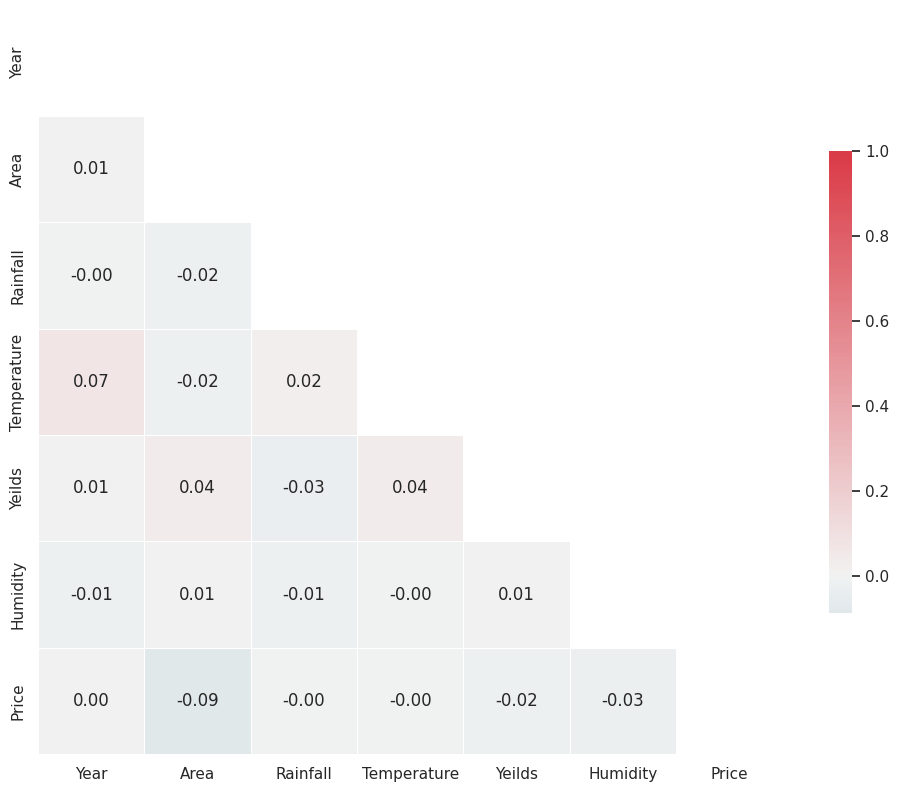

In [32]:
# Draw the heatmap with the mask and correct aspect ratio
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, fmt='.2f', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

# 5. Visualization

In [33]:
# Numerical Variables
numerical_cols.values


array(['Year', 'Area', 'Rainfall', 'Temperature', 'Yeilds', 'Humidity',
       'Price'], dtype=object)

In [34]:
# Categorical Variables
categorical_cols.values

array(['Location', 'Soil type', 'Irrigation', 'Crops', 'Season'],
      dtype=object)

## - Histogram Plots of Numerical Variables

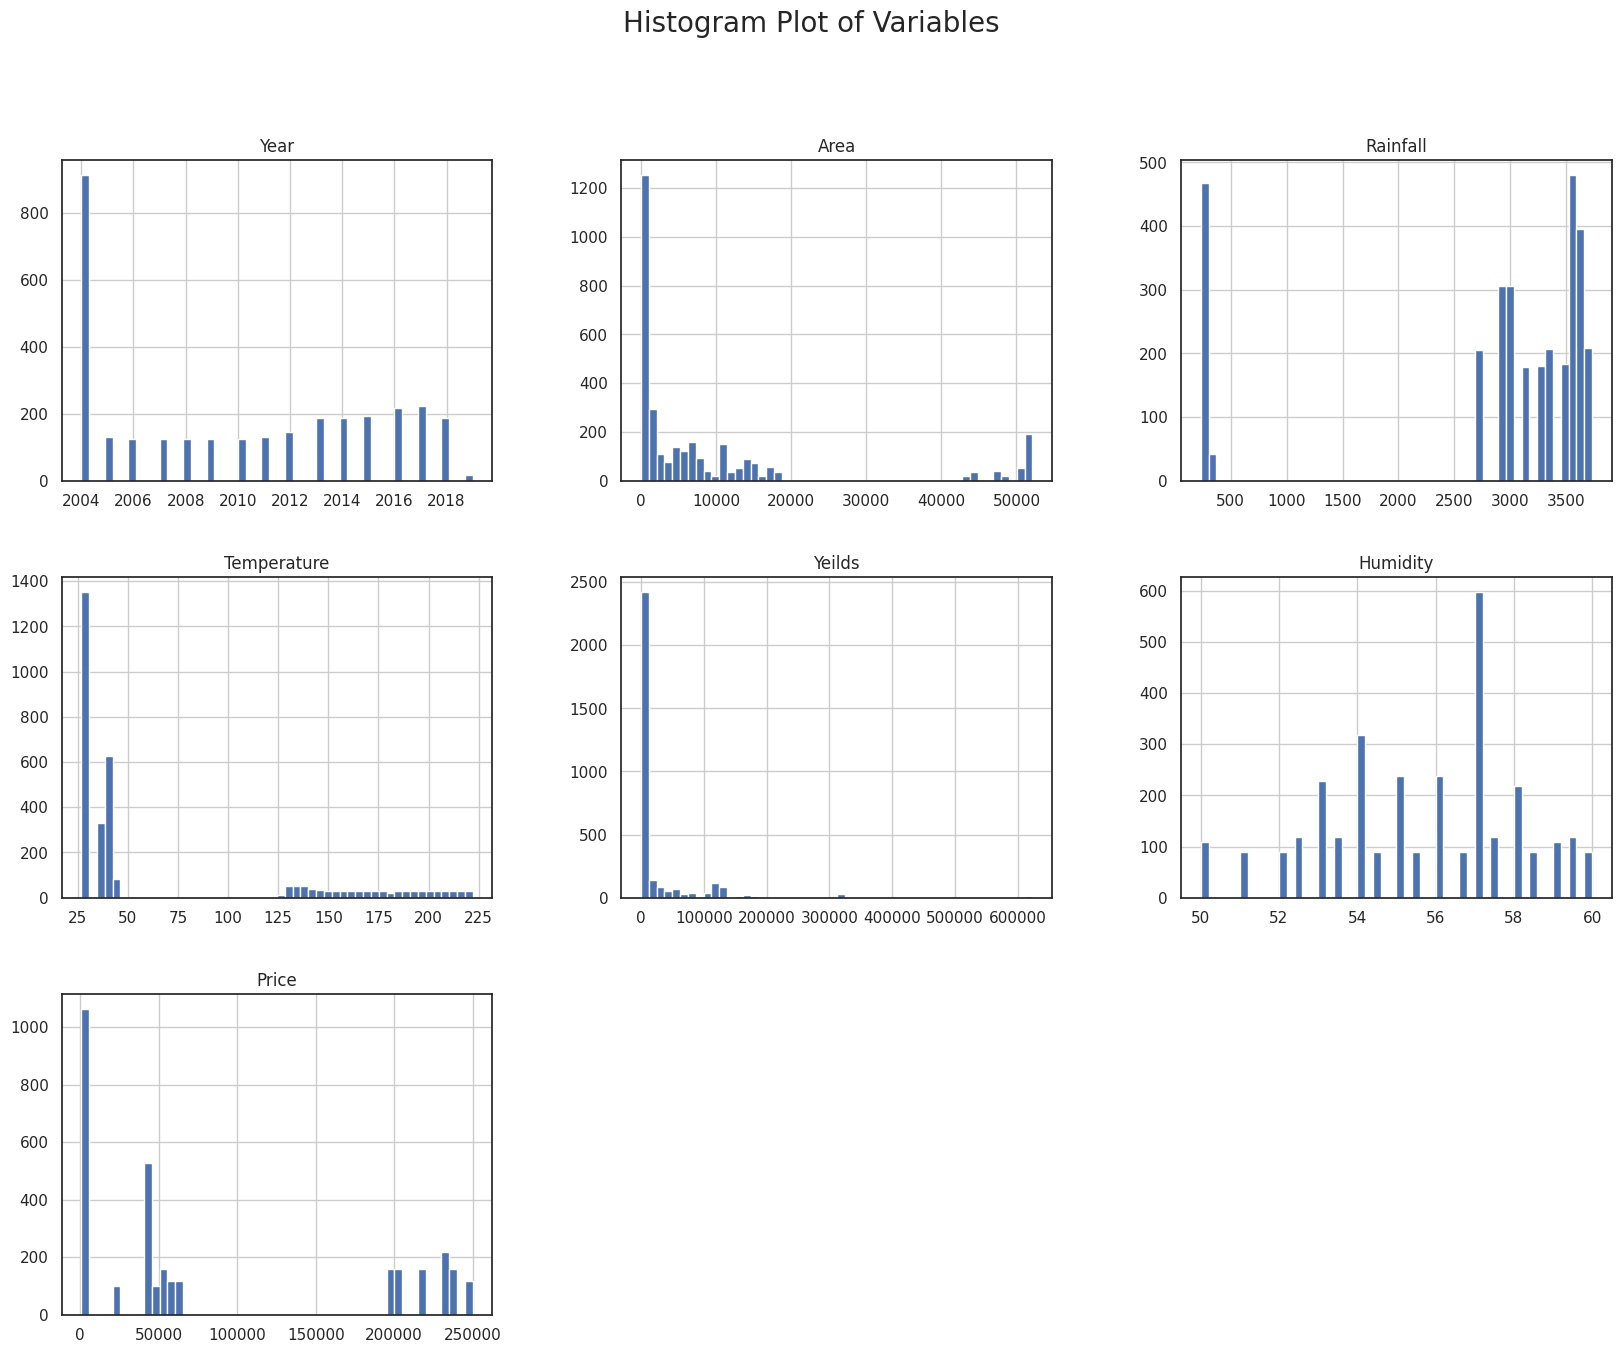

In [35]:
df.hist(bins=50, figsize=(20,15))
plt.suptitle("Histogram Plot of Variables", fontsize=20)
plt.show()

## - Distribution of Numerical Variables

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

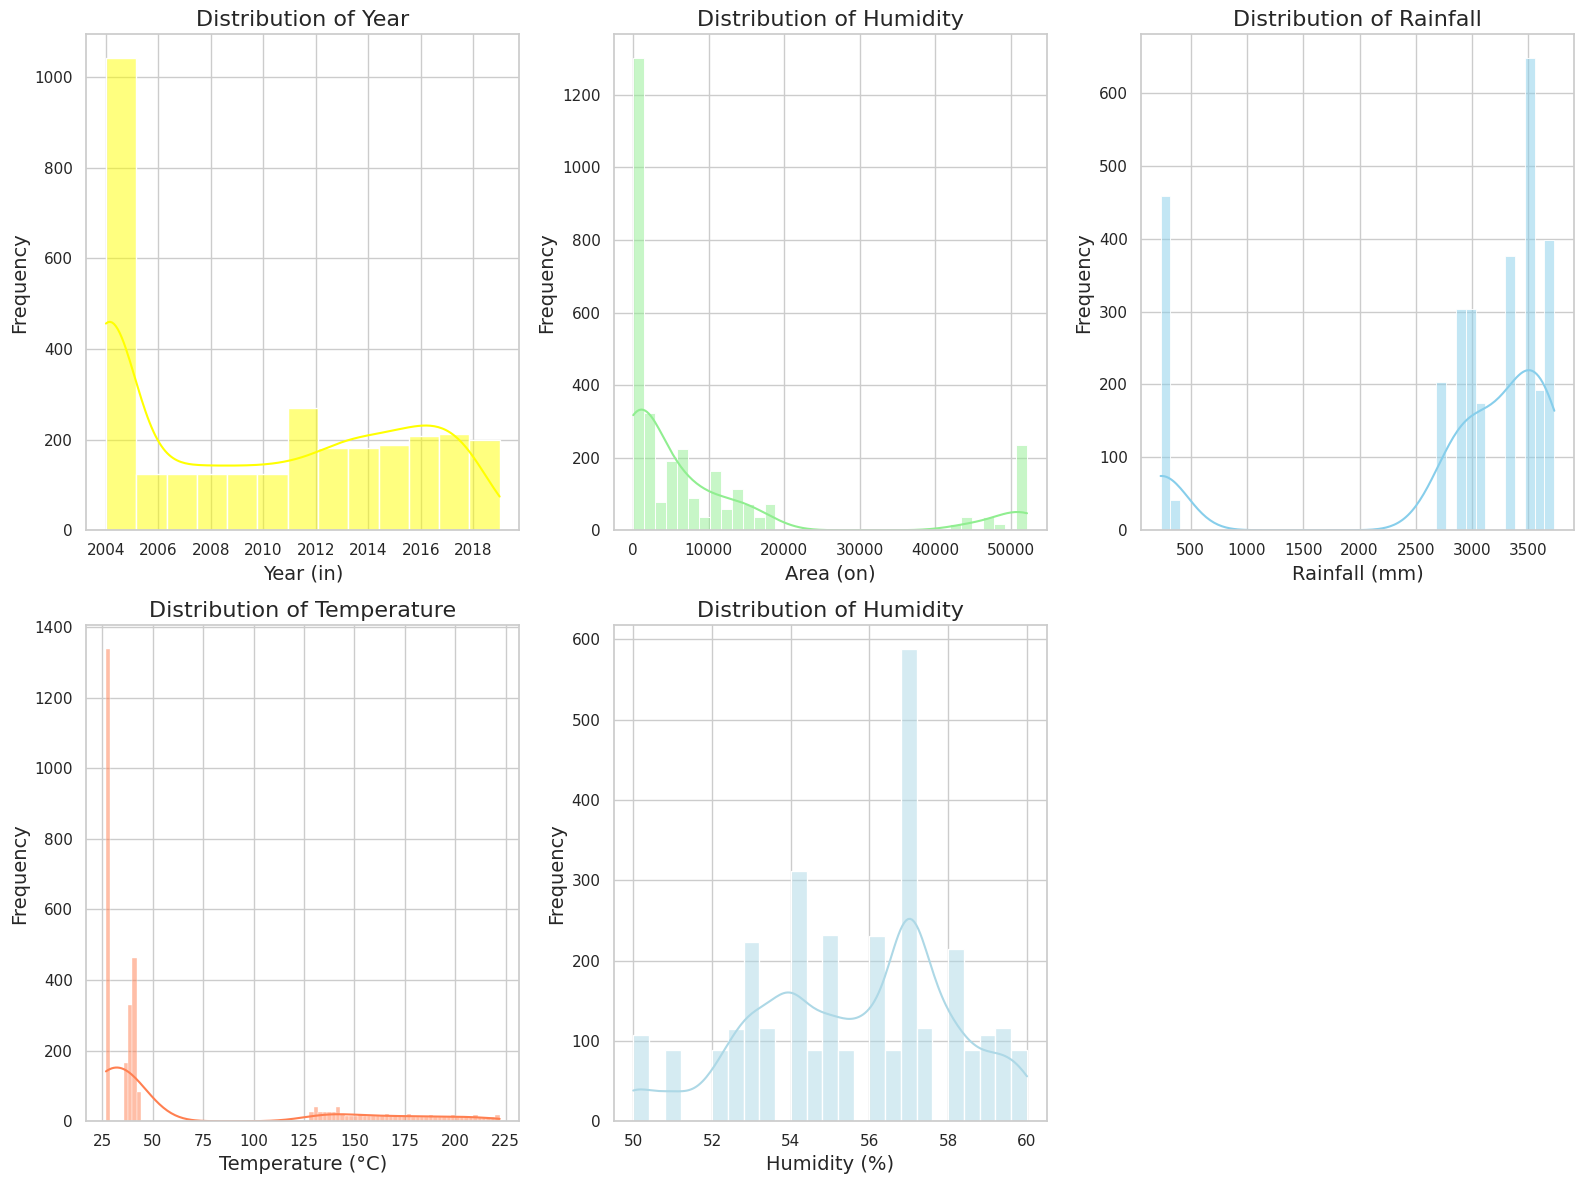

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

# Year Distribution
plt.subplot(2, 3, 1)
sns.histplot(df_c['Year'], kde=True, color= 'yellow' )
plt.title('Distribution of Year', fontsize=16)
plt.xlabel('Year (in)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Area Distribution
plt.subplot(2, 3, 2)
sns.histplot(df_c['Area'], kde=True, color='lightgreen')
plt.title('Distribution of Humidity', fontsize=16)
plt.xlabel('Area (on)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rainfall Distribution
plt.subplot(2, 3, 3)
sns.histplot(df_c['Rainfall'], kde=True, color='skyblue')
plt.title('Distribution of Rainfall', fontsize=16)
plt.xlabel('Rainfall (mm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Temperature Distribution
plt.subplot(2, 3, 4)
sns.histplot(df_c['Temperature'], kde=True, color='coral')
plt.title('Distribution of Temperature', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Humidity Distribution
plt.subplot(2, 3, 5)
sns.histplot(df_c['Humidity'], kde=True, color='lightblue')
plt.title('Distribution of Humidity', fontsize=16)
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.tight_layout()
plt.show()

## - Distribution of Categorical Variables

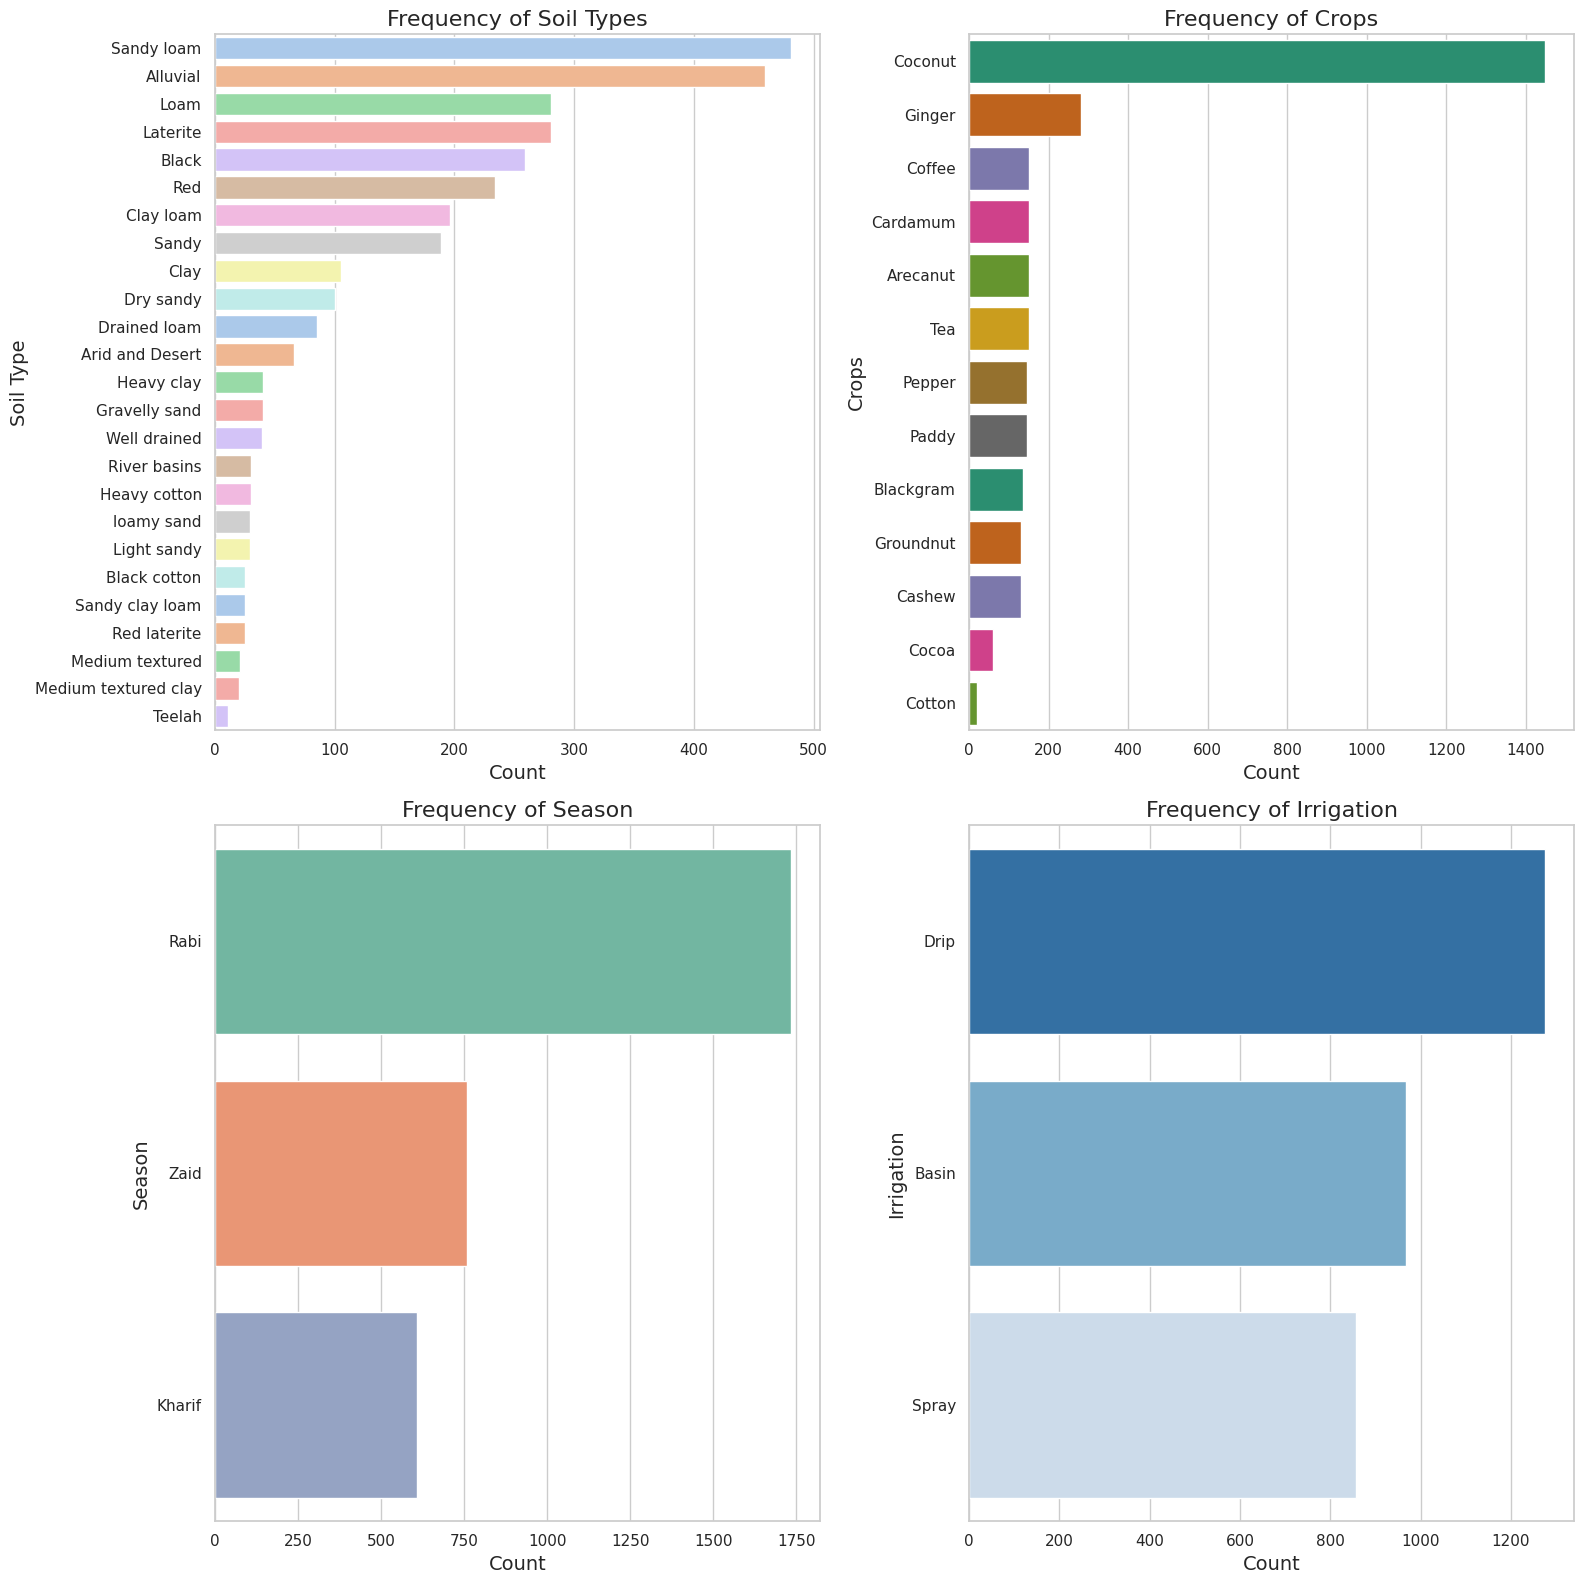

In [37]:
plt.figure(figsize=(16, 16))

['Location', 'Soil type', 'Irrigation', 'Crops', 'Season']

# Soil Type Frequency
plt.subplot(2, 2, 1)
Soil_counts = df_c['Soil type'].value_counts()
sns.barplot(x=Soil_counts.values, y=Soil_counts.index, palette='pastel')
plt.title('Frequency of Soil Types', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Soil Type', fontsize=14)

# Crop Frequency
plt.subplot(2, 2, 2)
Crop_counts = df_c['Crops'].value_counts()
sns.barplot(x=Crop_counts.values, y=Crop_counts.index, palette='Dark2')
plt.title('Frequency of Crops', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Crops', fontsize=14)

# Season Frequency
plt.subplot(2, 2, 3)
Season_counts = df_c['Season'].value_counts()
sns.barplot(x=Season_counts.values, y=Season_counts.index, palette='Set2')
plt.title('Frequency of Season', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Season', fontsize=14)

# Irrigation Frequency
plt.subplot(2, 2, 4)
Irrigation_counts = df_c['Irrigation'].value_counts()
sns.barplot(x=Irrigation_counts.values, y=Irrigation_counts.index, palette='Blues_r')
plt.title('Frequency of Irrigation', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Irrigation', fontsize=14)


plt.tight_layout()
plt.show()

## - Plot a Pie Chart for Each Categorical Variable

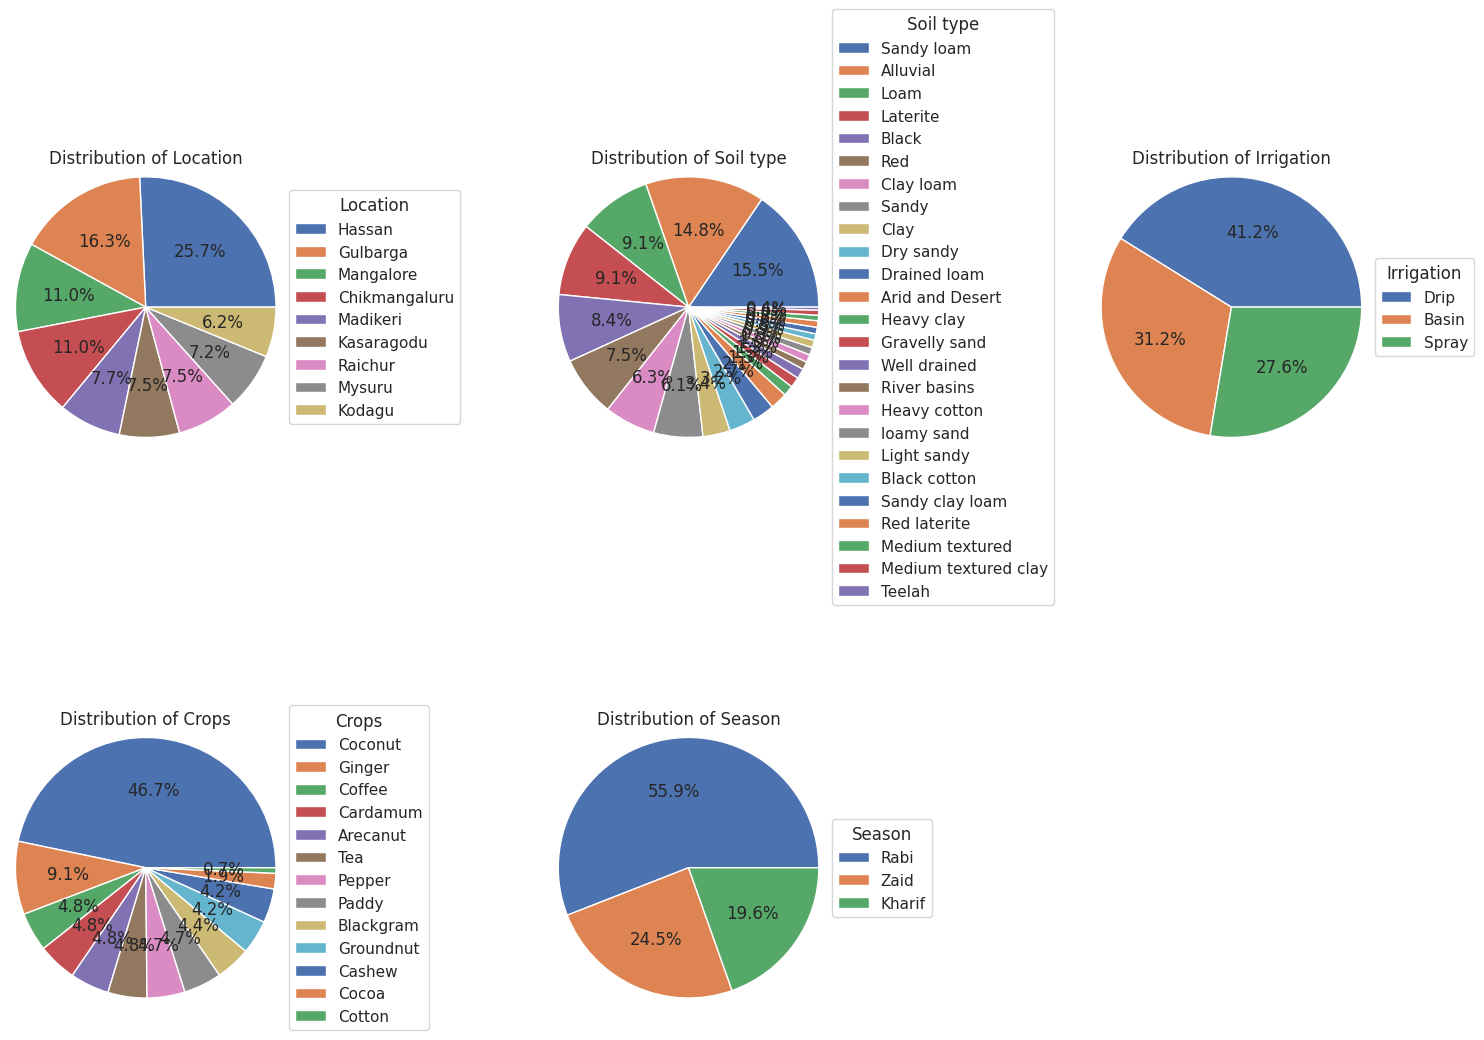

In [38]:
variables = ["Location", "Soil type", "Irrigation", "Crops", "Season"]

# Dynamically determine rows and columns based on the number of variables
n_variables = len(variables)
n_cols = 3  # Fixed number of columns
n_rows = math.ceil(n_variables / n_cols)  # Calculate rows dynamically

# Create subplots with the required number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through the variables and plot on each subplot
for idx, variable in enumerate(variables):
    variable_counts = df_c[variable].value_counts()

    # Plot pie chart on the corresponding subplot
    wedges, texts, autotexts = axes[idx].pie(
        variable_counts, autopct='%1.1f%%', radius=1.2
    )

    # Add legend to the right of the pie chart
    axes[idx].legend(
        variable_counts.index,
        title=variable,
        loc="center left",
        bbox_to_anchor=(1, 0.5)
    )

    # Set title for the current subplot
    axes[idx].set_title("Distribution of " + variable)
    axes[idx].set_ylabel('')  # Remove default ylabel for cleaner plots

# Hide any remaining unused axes
for idx in range(len(variables), len(axes)):
    fig.delaxes(axes[idx])

# Adjust spacing between pie charts
plt.tight_layout()
plt.subplots_adjust(wspace=1.0, hspace=1.0)  # Increase horizontal and vertical spacing

# Display the plot
plt.show()


## - Kernel Density Estimate (KDE) Plot and Box Plot for Numerical Distributions

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

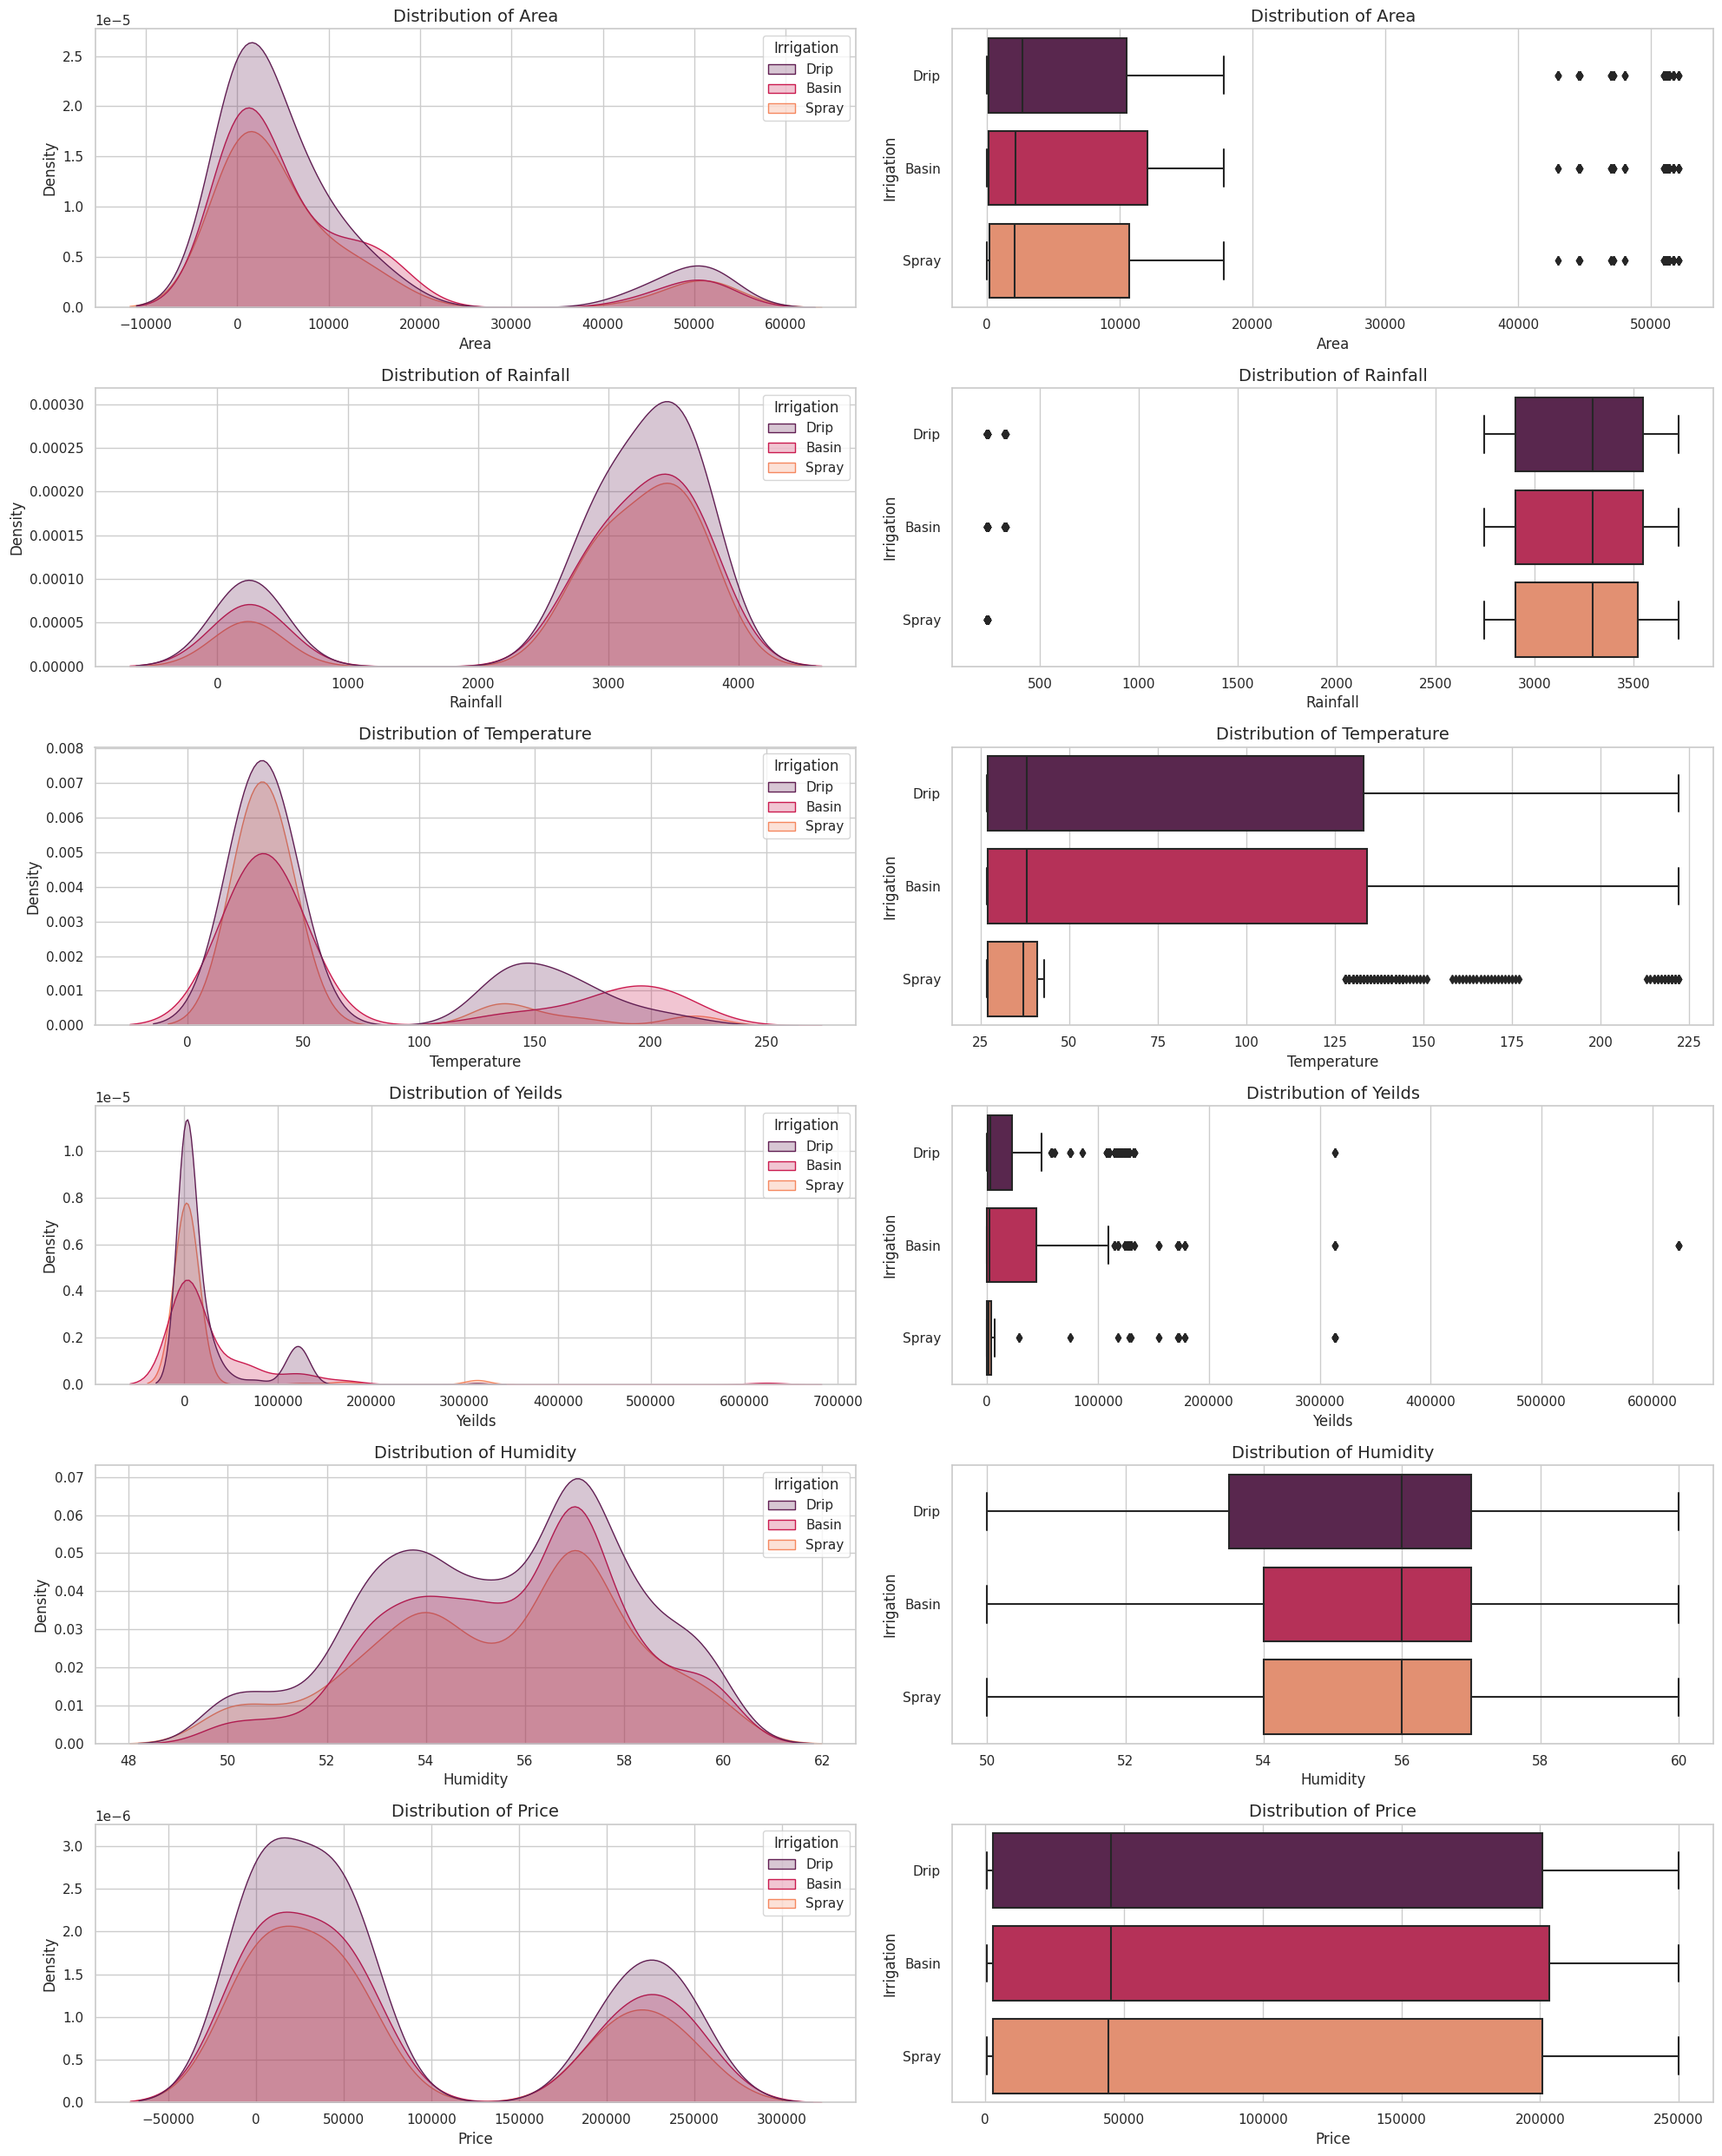

In [39]:
num_columns = ['Area', 'Rainfall', 'Temperature', 'Yeilds', 'Humidity','Price']
fig, axes = plt.subplots(6, 2, figsize=(20, 25))

# Loop through numerical columns
for idx, col in enumerate(num_columns):

    # Row index
    row = idx  # This is equal to the loop index for each variable

    # KDE plot (first column in the row)
    sns.kdeplot(data=df_c, x=col, hue="Irrigation", fill=True, palette="rocket", ax=axes[row, 0])

    axes[row, 0].set_title(f"Distribution of {col}", fontsize=14)

    # Boxplot (second column in the row)
    sns.boxplot(data=df_c, x=col, y='Irrigation', palette='rocket', orient='h',ax=axes[row, 1])
    axes[row, 1].set_title(f"Distribution of {col}", fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## - Countplot of **Categorical Variables** vs **Year**

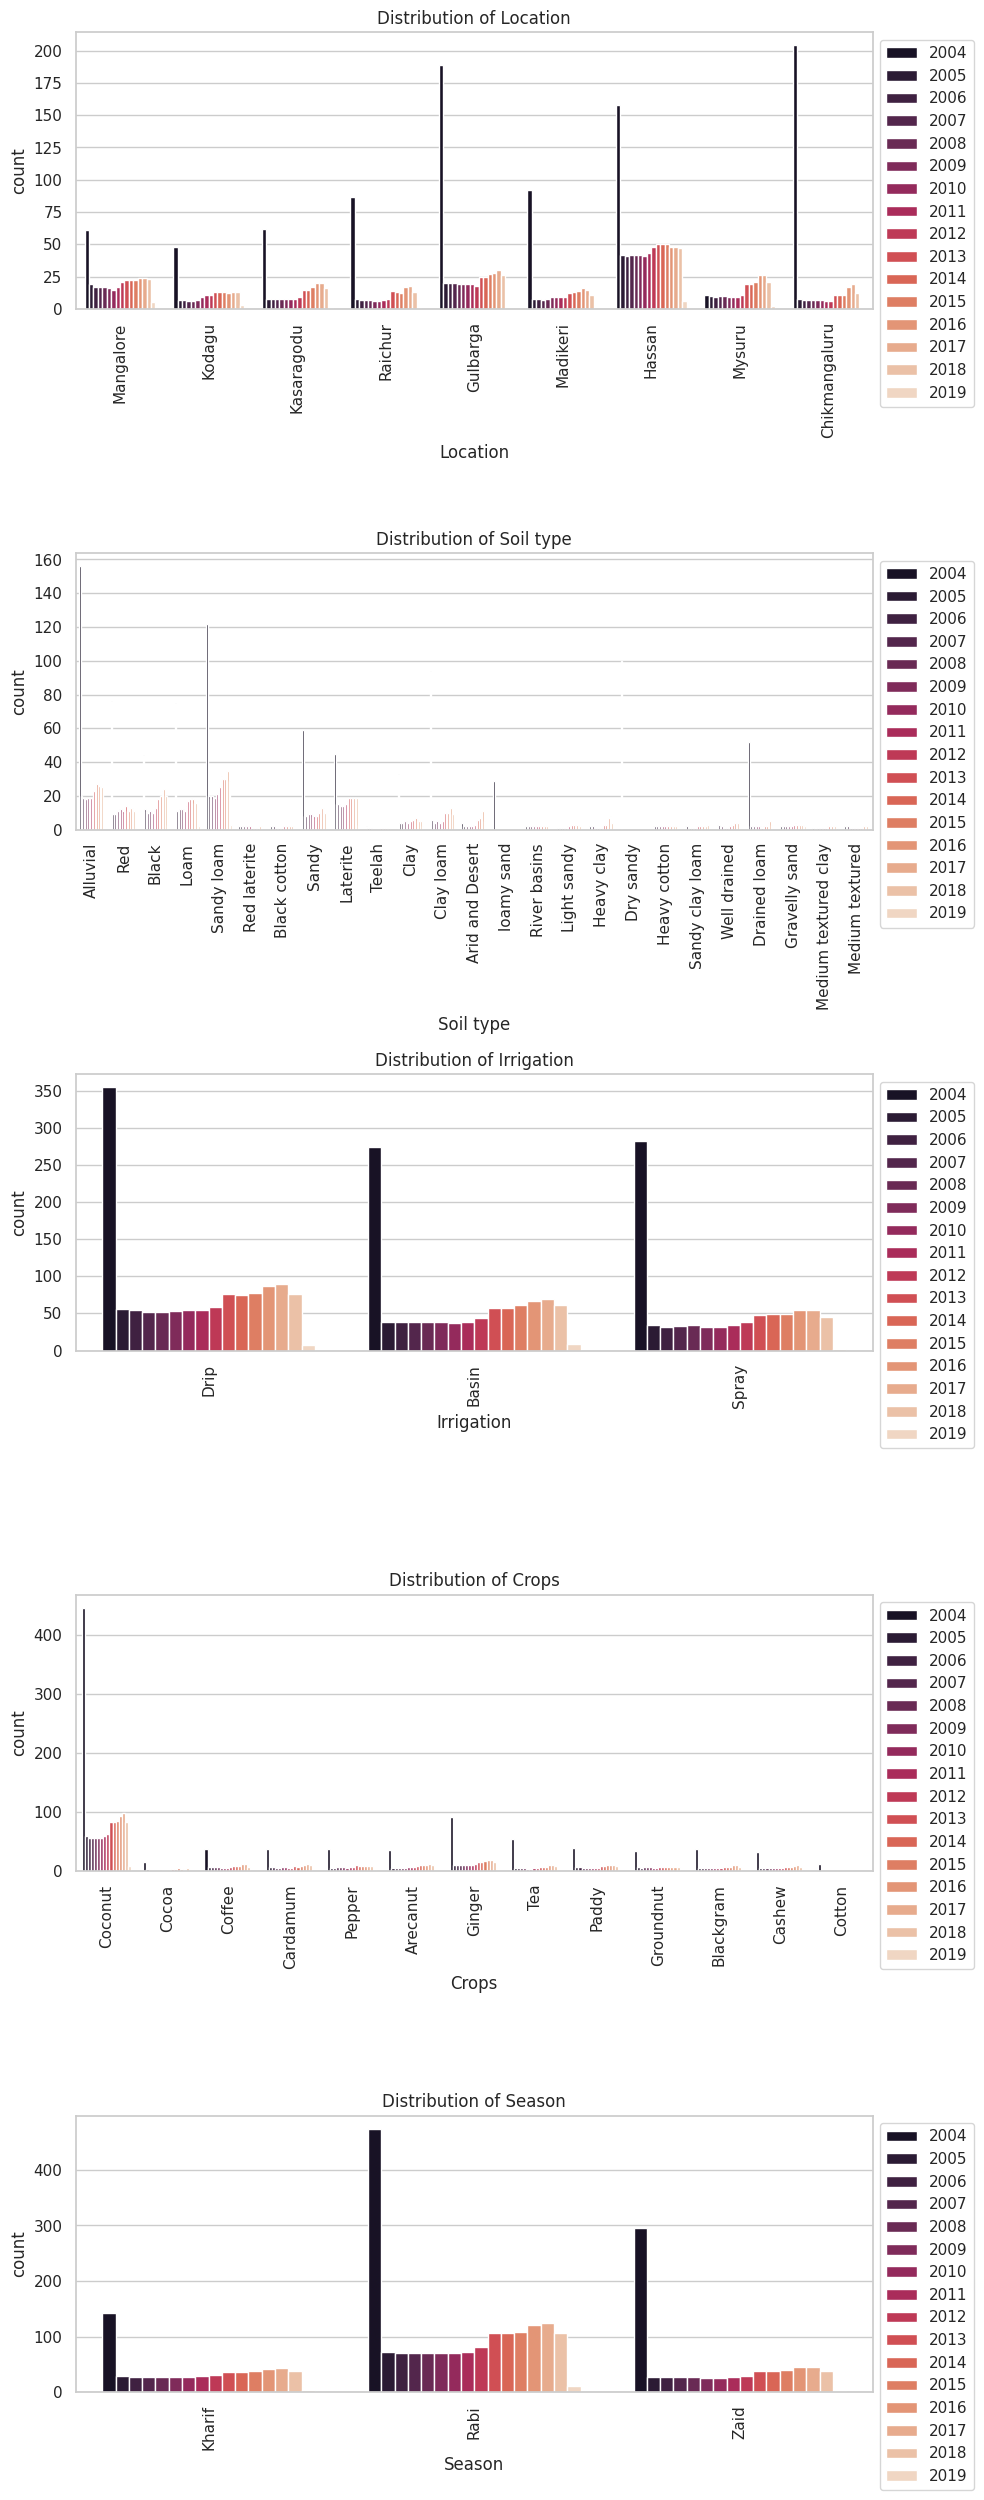

In [40]:
# Calculate the number of rows needed
n_rows = len(categorical_cols.values)

# Create a figure with a single column
fig, axes = plt.subplots(n_rows, 1, figsize=(10, 5 * n_rows))  # Adjust height per plot

# If there's only one row, axes won't be an array, so handle it accordingly
if n_rows == 1:
    axes = [axes]  # Wrap single axis in a list for consistent iteration

# Plot each countplot
for ax, col in zip(axes, categorical_cols.values):
    sns.countplot(data=df_c, x=col, hue="Year", palette='rocket', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels

    # Move legend to the right side of the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position

plt.tight_layout()
plt.show()


## - Countplot of **Numerical Variables** vs **Season**

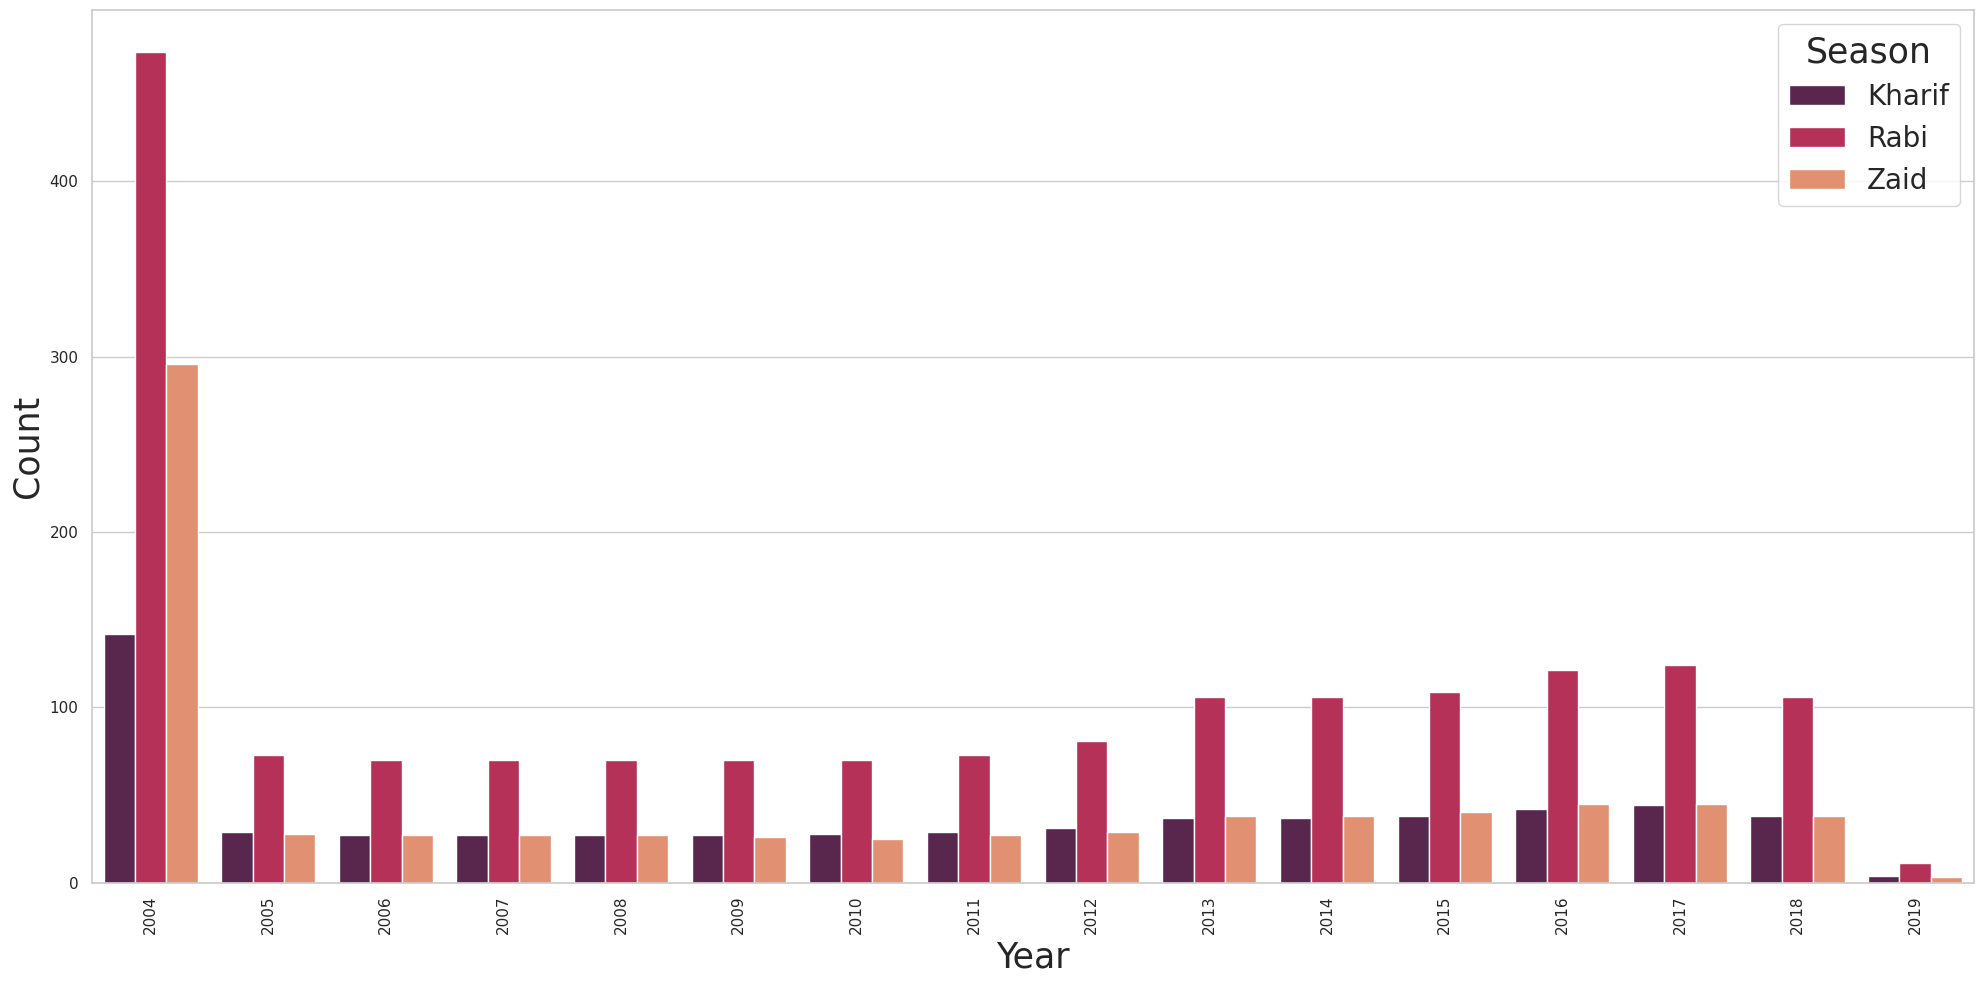

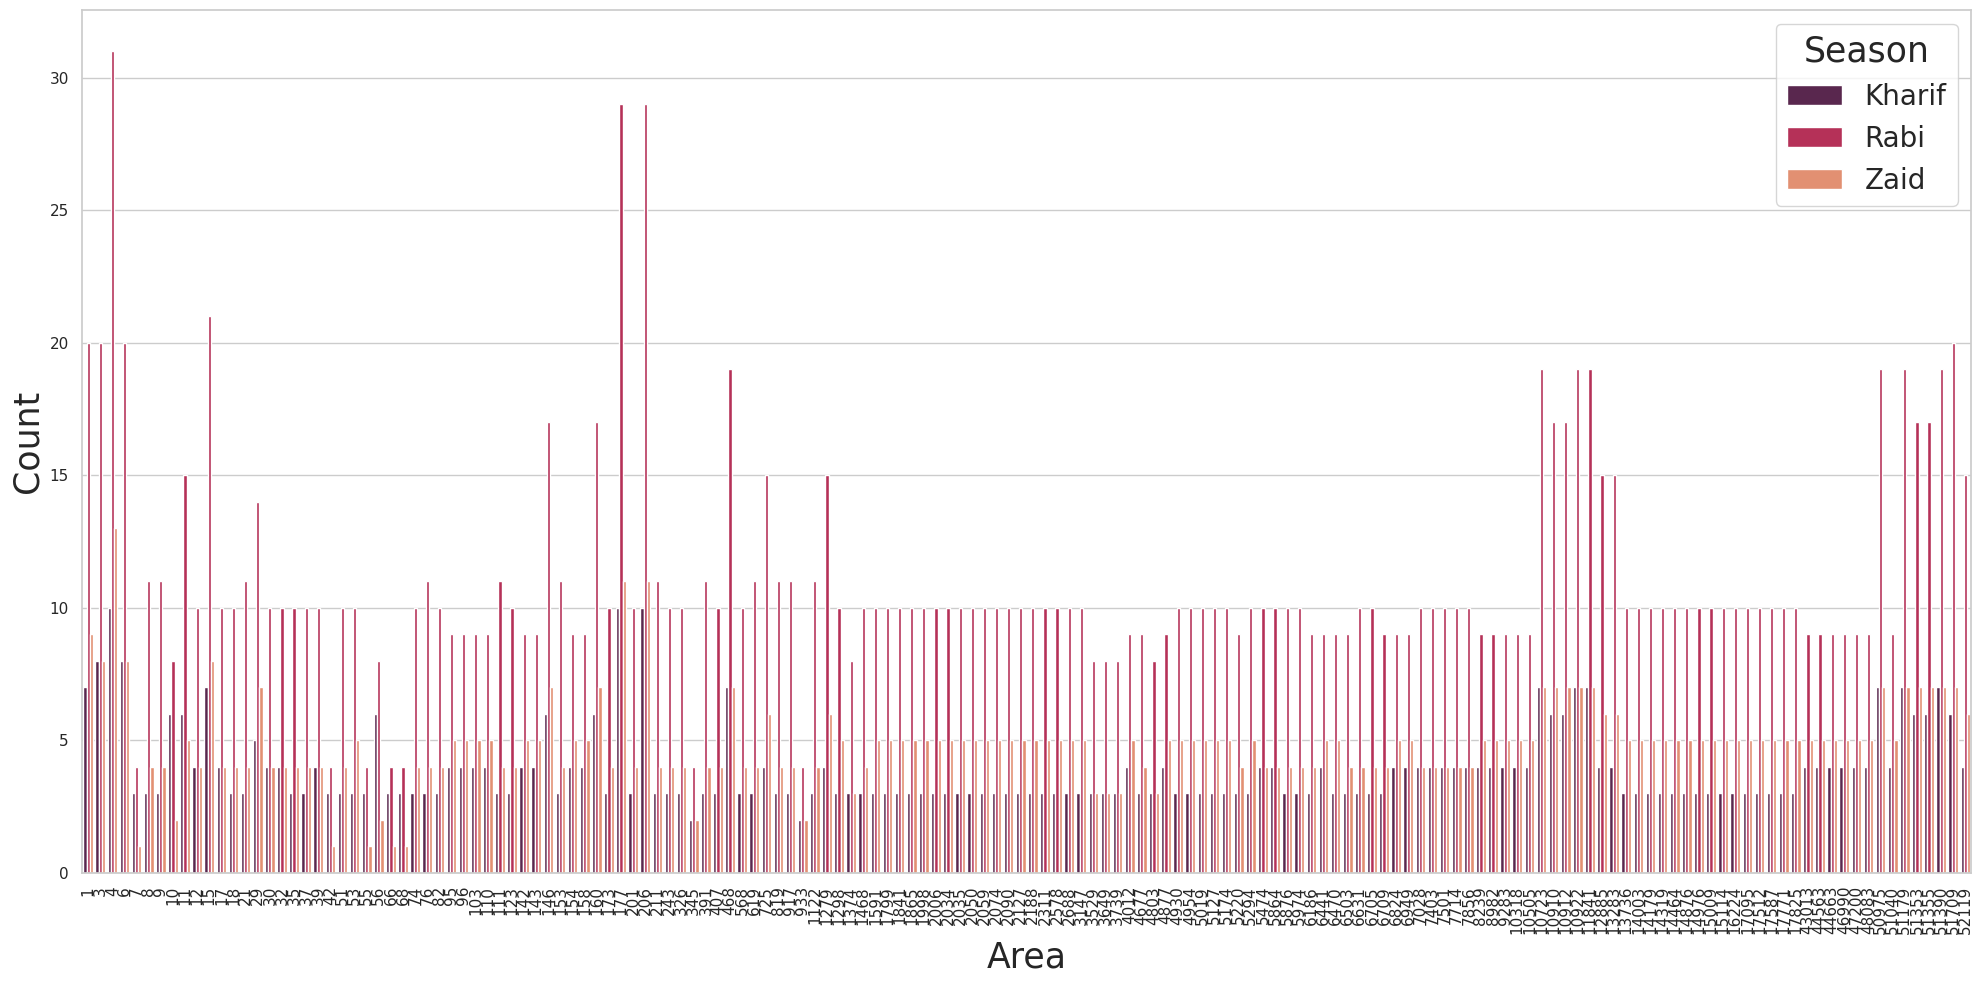

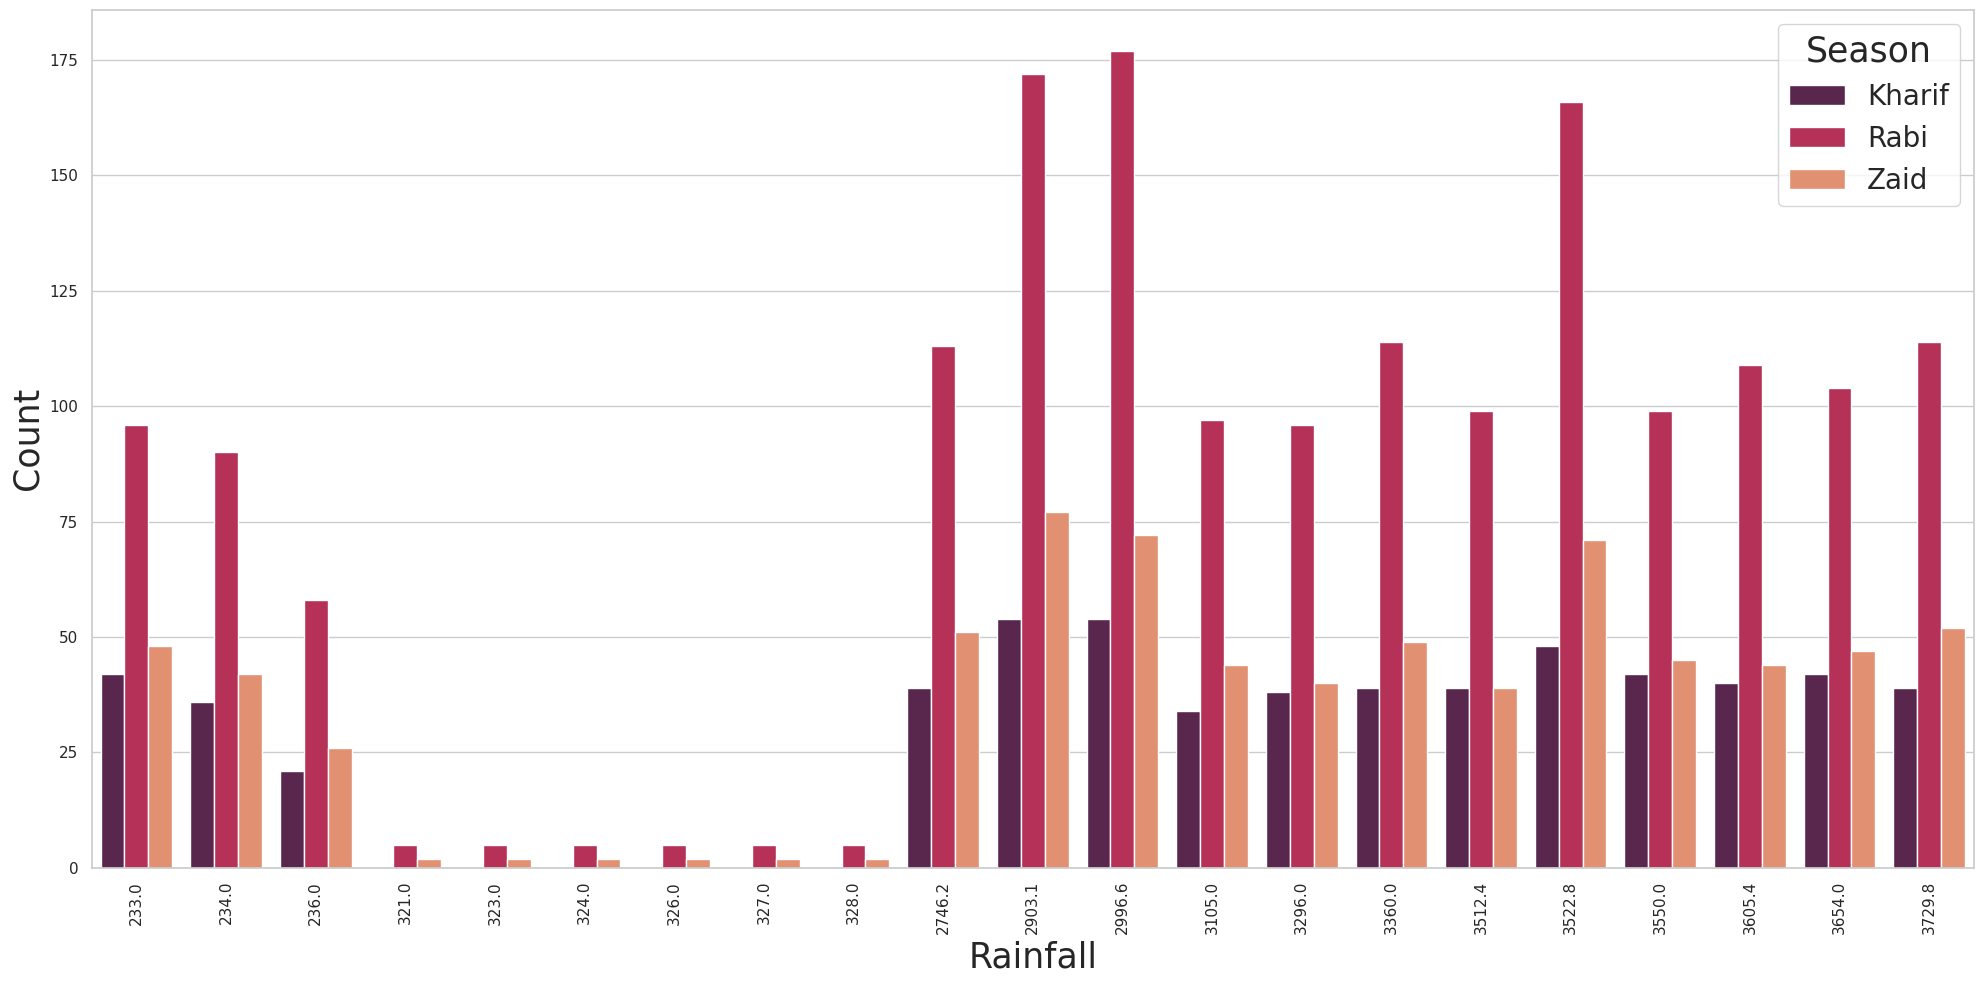

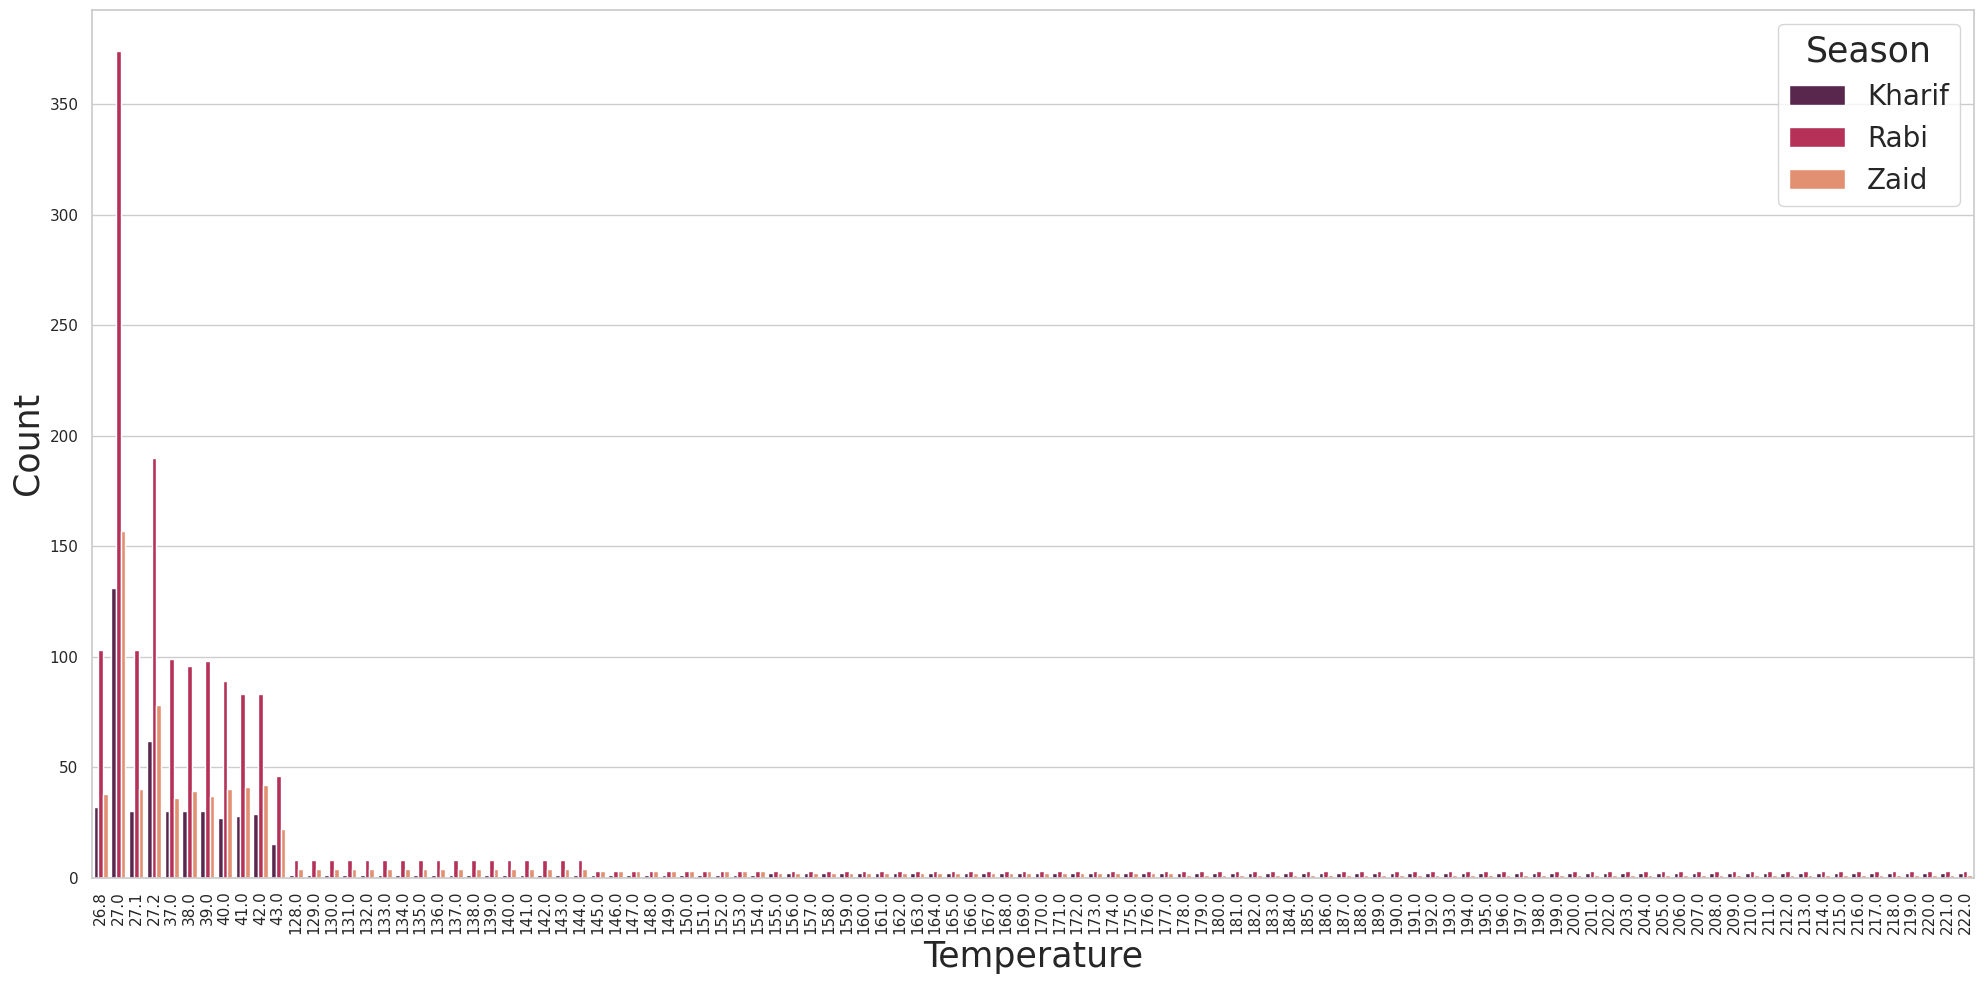

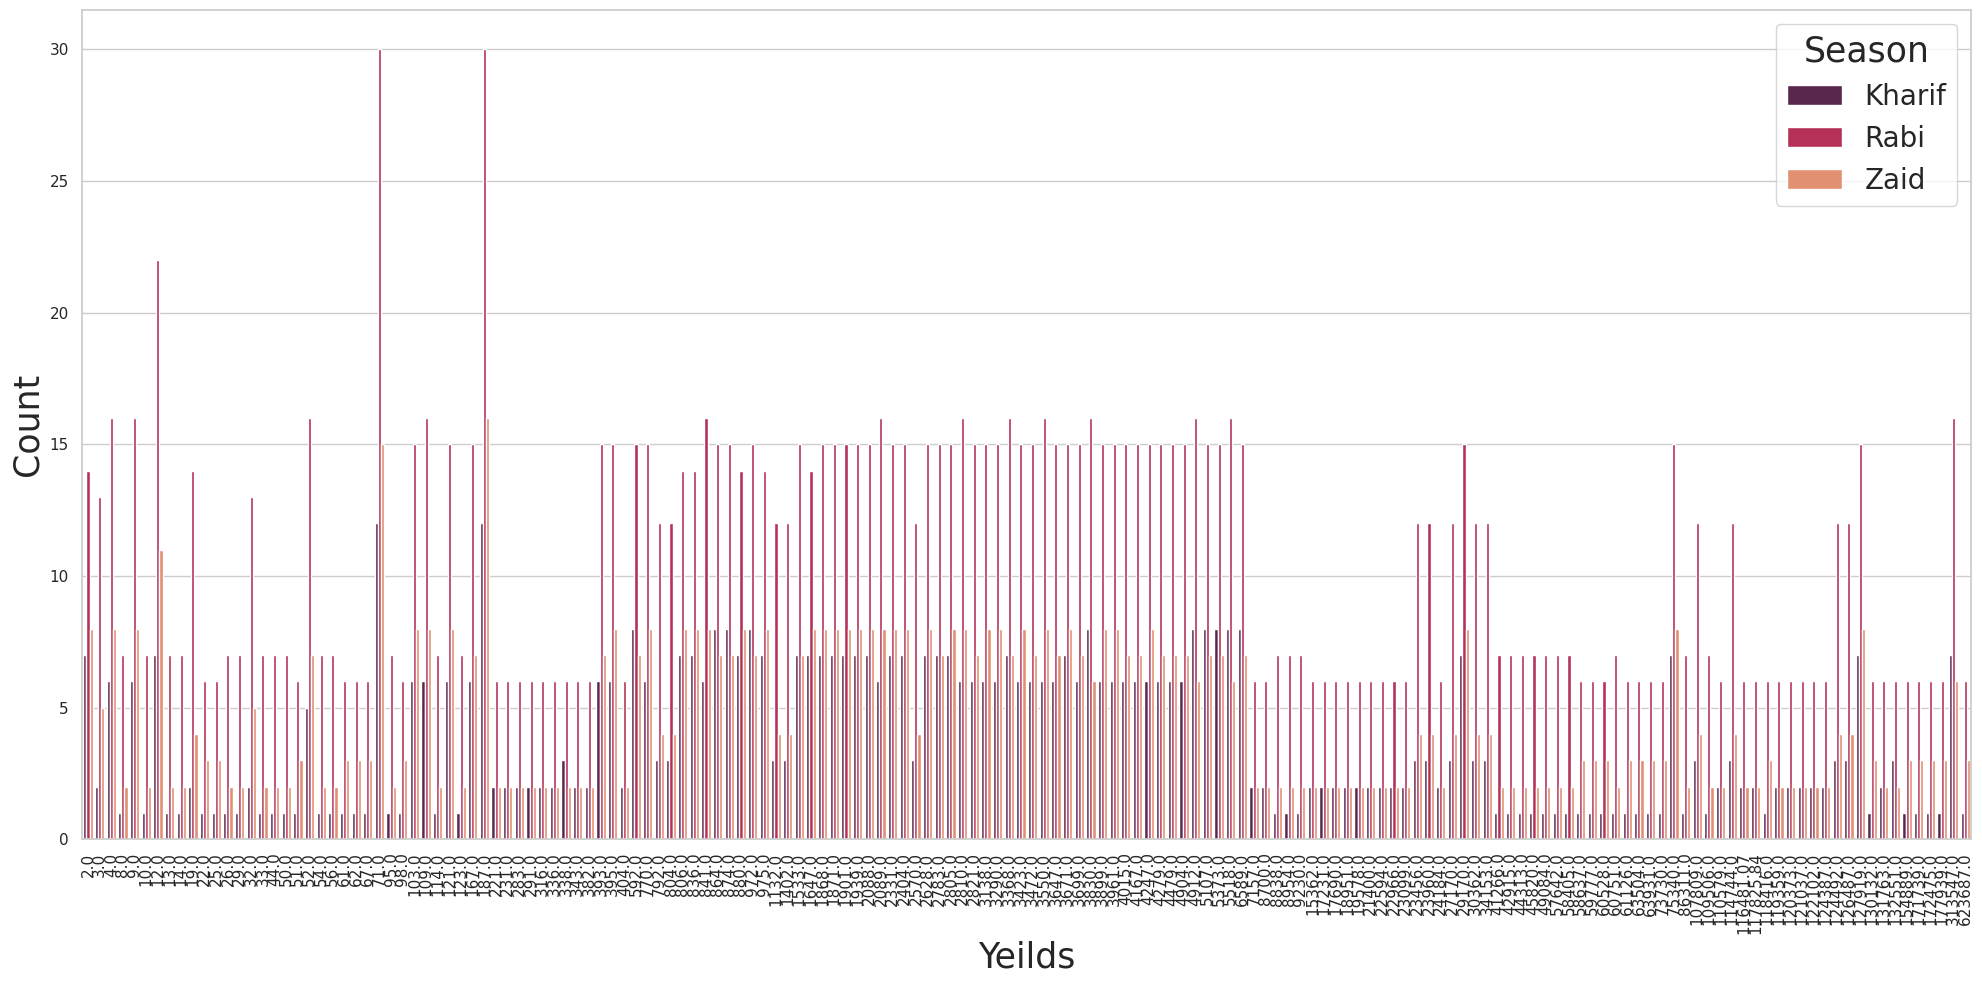

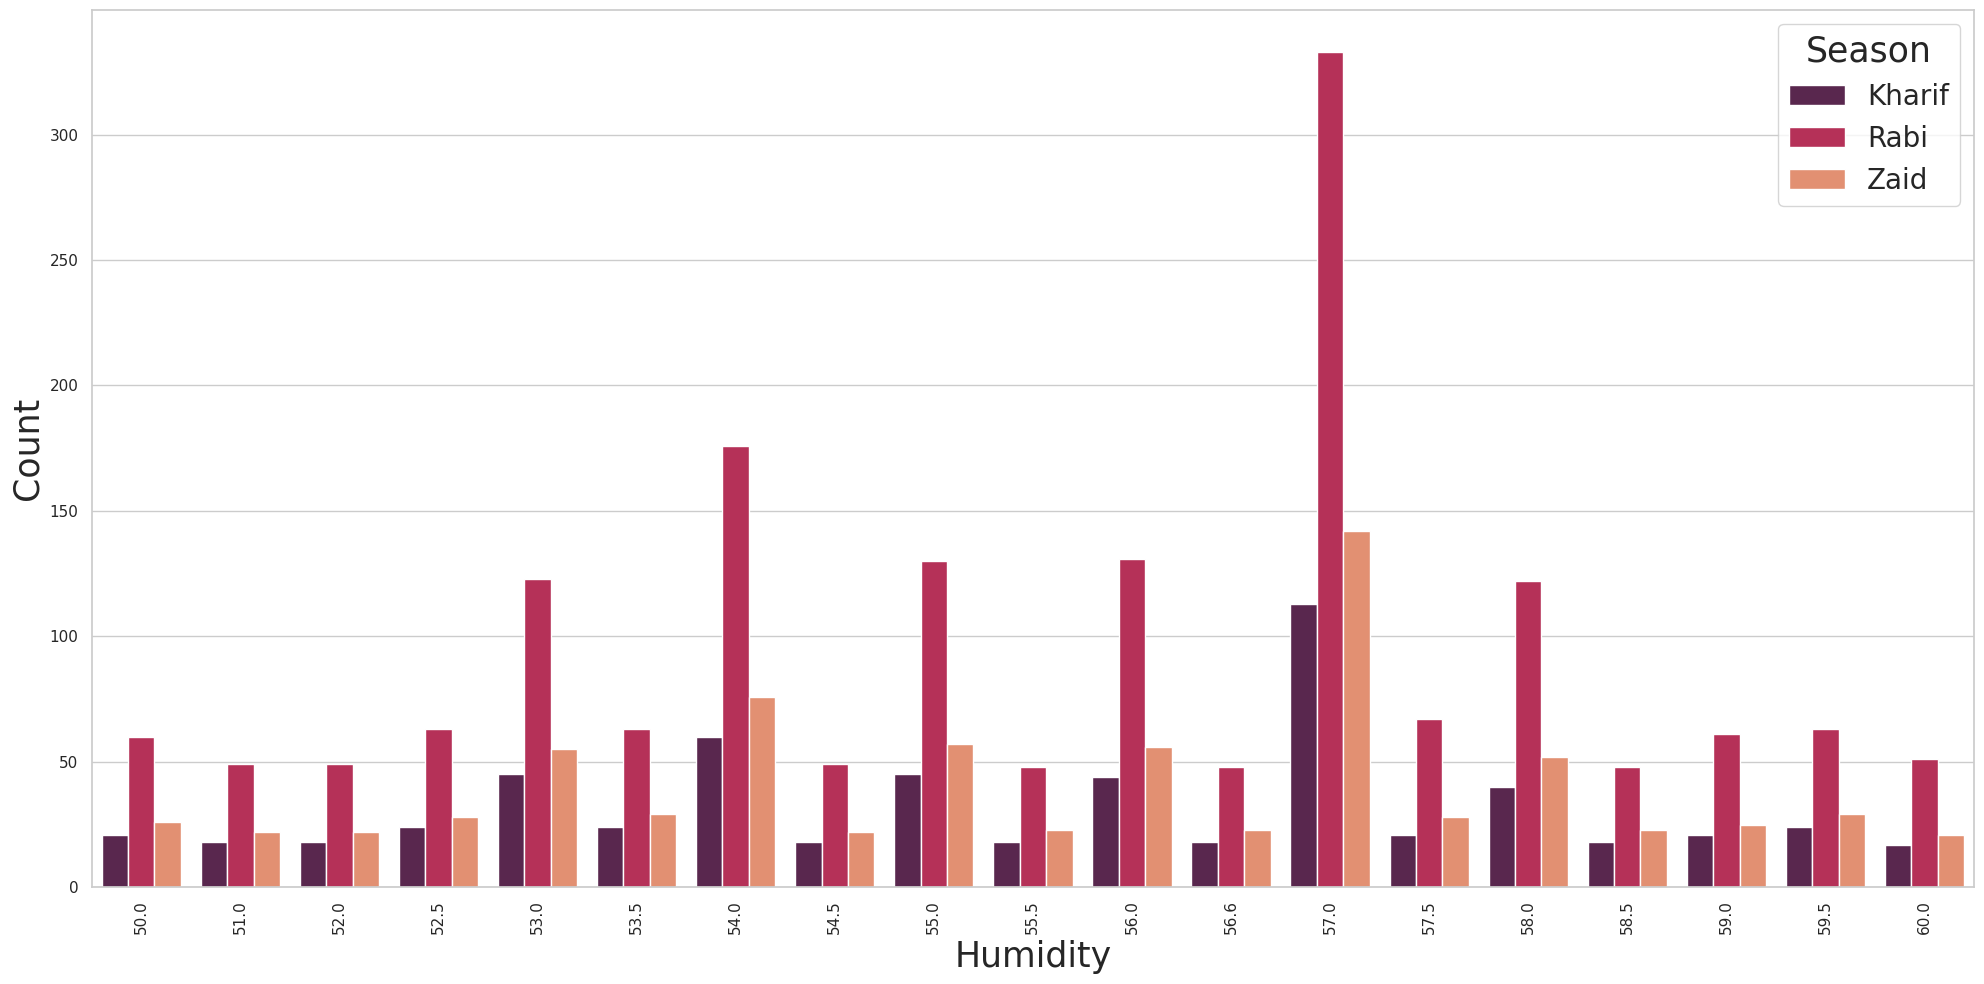

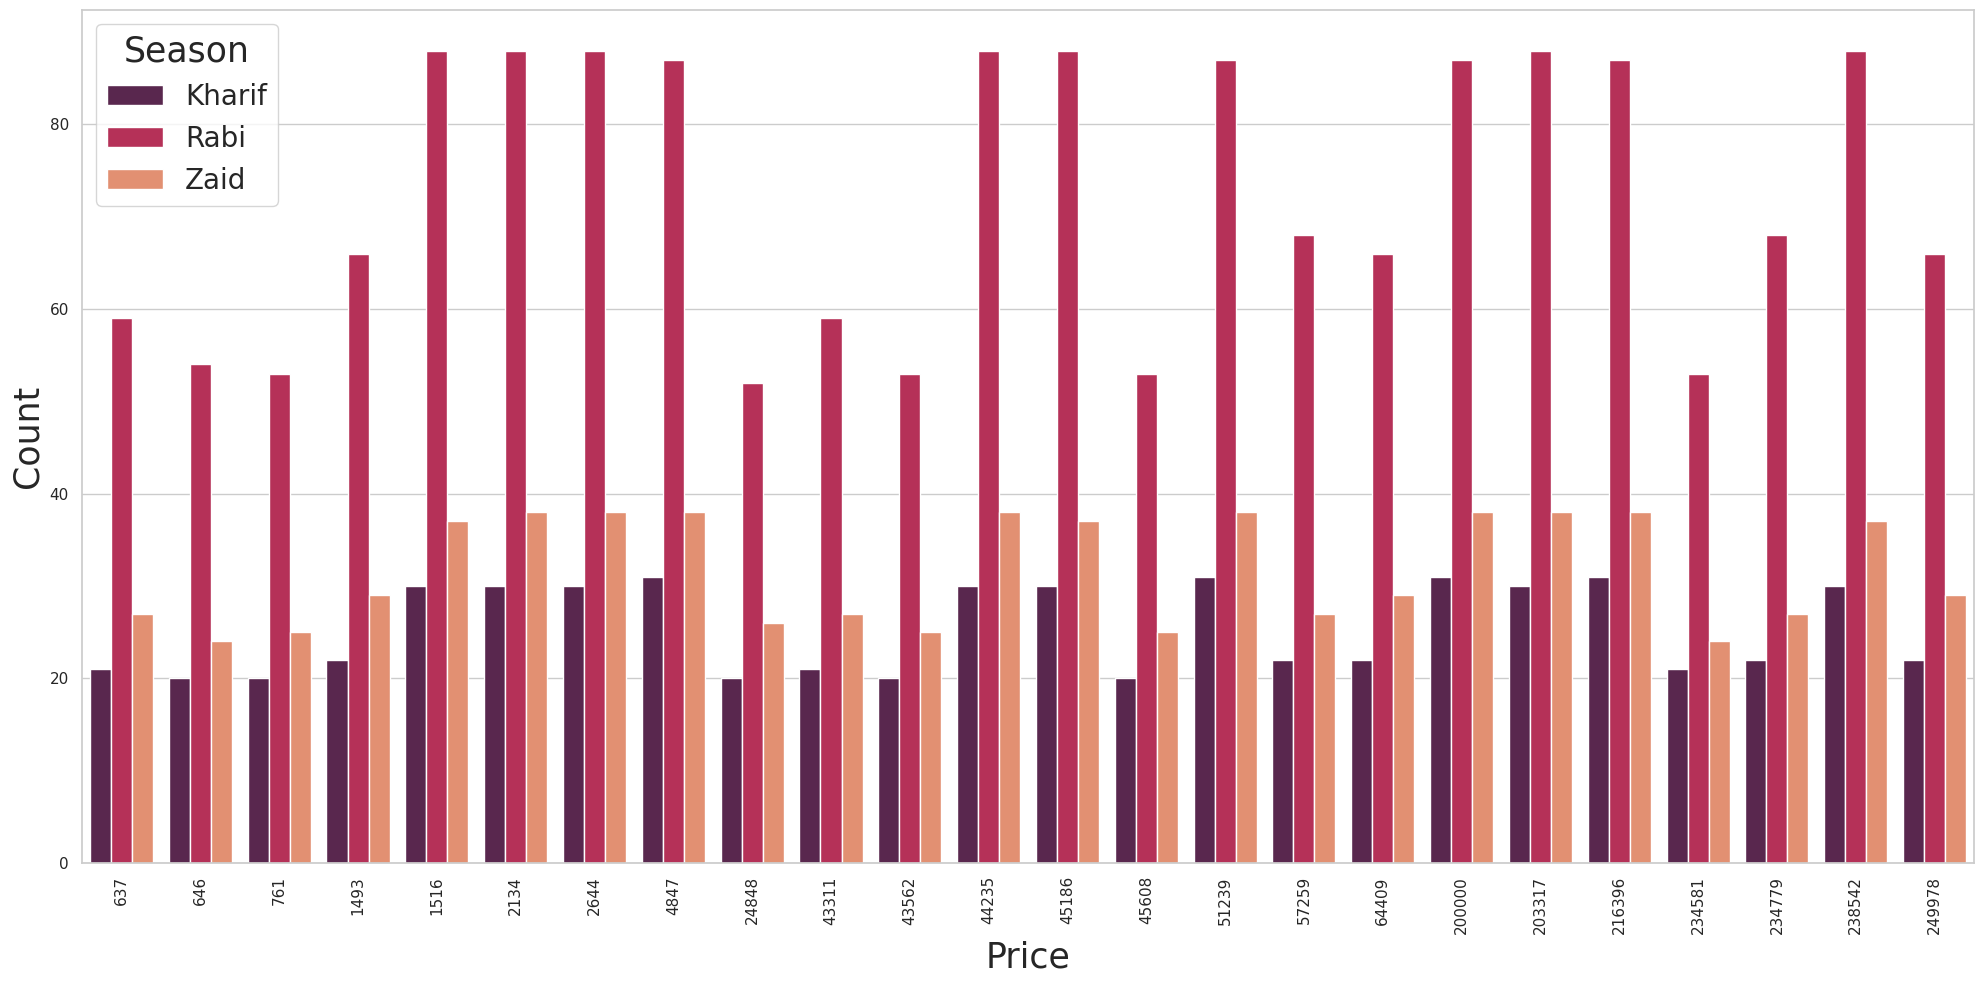

In [41]:
# Loop through each column in num_columns
for i, col in enumerate(numerical_cols):

    plt.figure(figsize=(20, 10))

    # Create countplot
    myplot = sns.countplot(data=df_c, x=col, hue="Season", palette='rocket')

    # Rotate x-tick labels and adjust label sizes
    myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)

    # Set axis labels
    myplot.set_xlabel(col, fontsize=25)
    myplot.set_ylabel("Count", fontsize=25)

    # Increase legend size
    myplot.legend(title='Season', fontsize=20, title_fontsize=25)

    # Adjust the layout and show the plot
    plt.tight_layout()
    plt.show()


## - Countplot of **Categorical Variables** vs **Season**

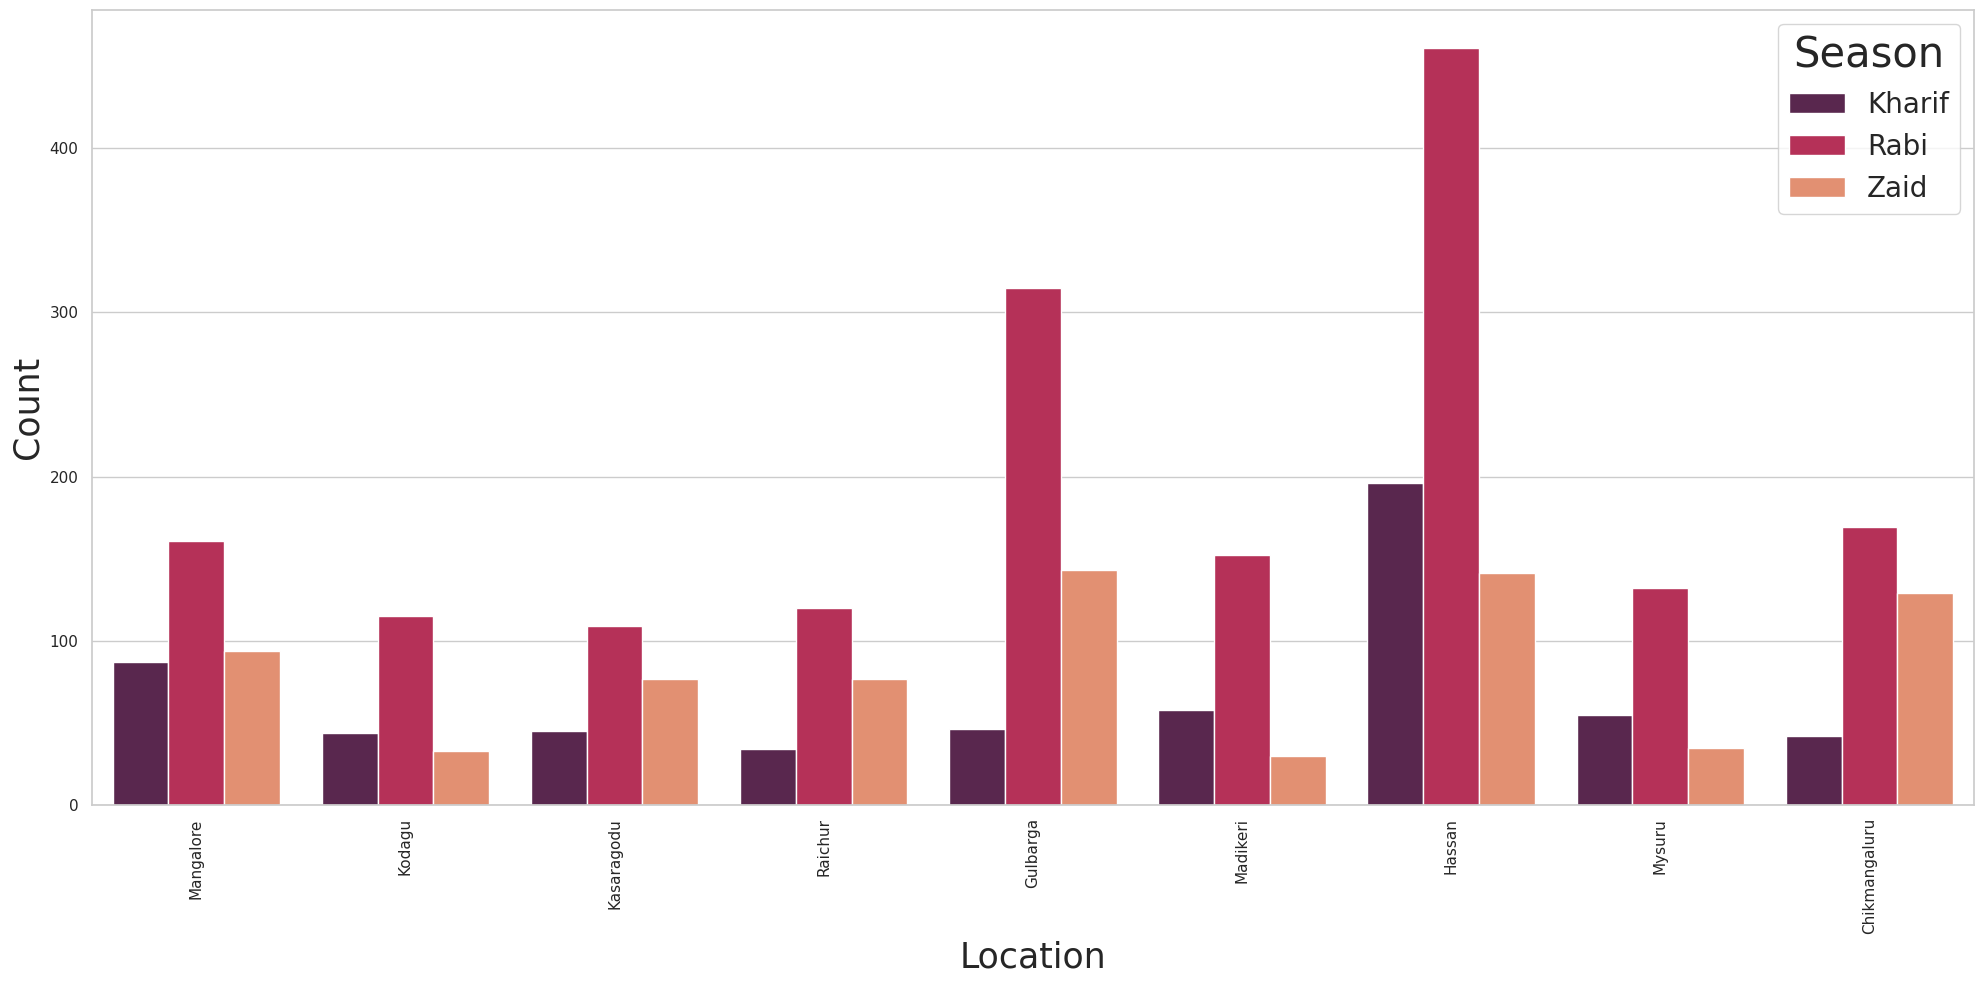

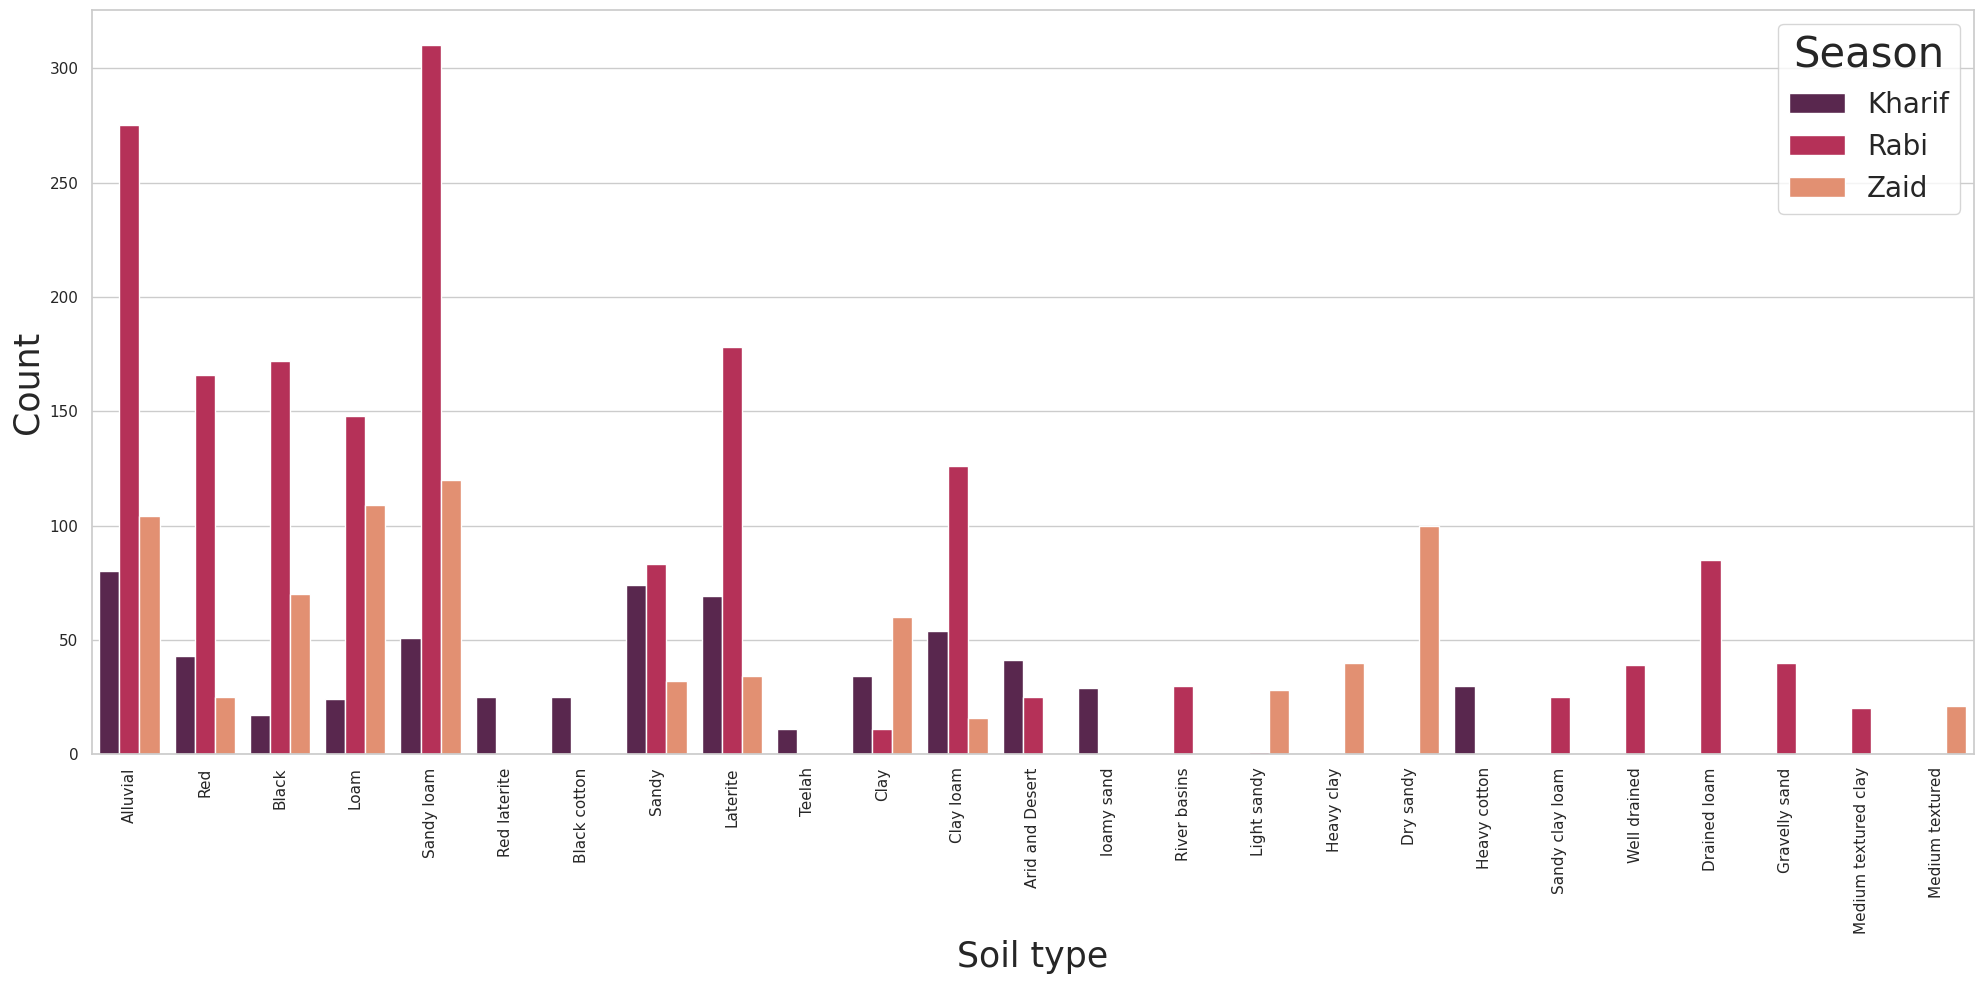

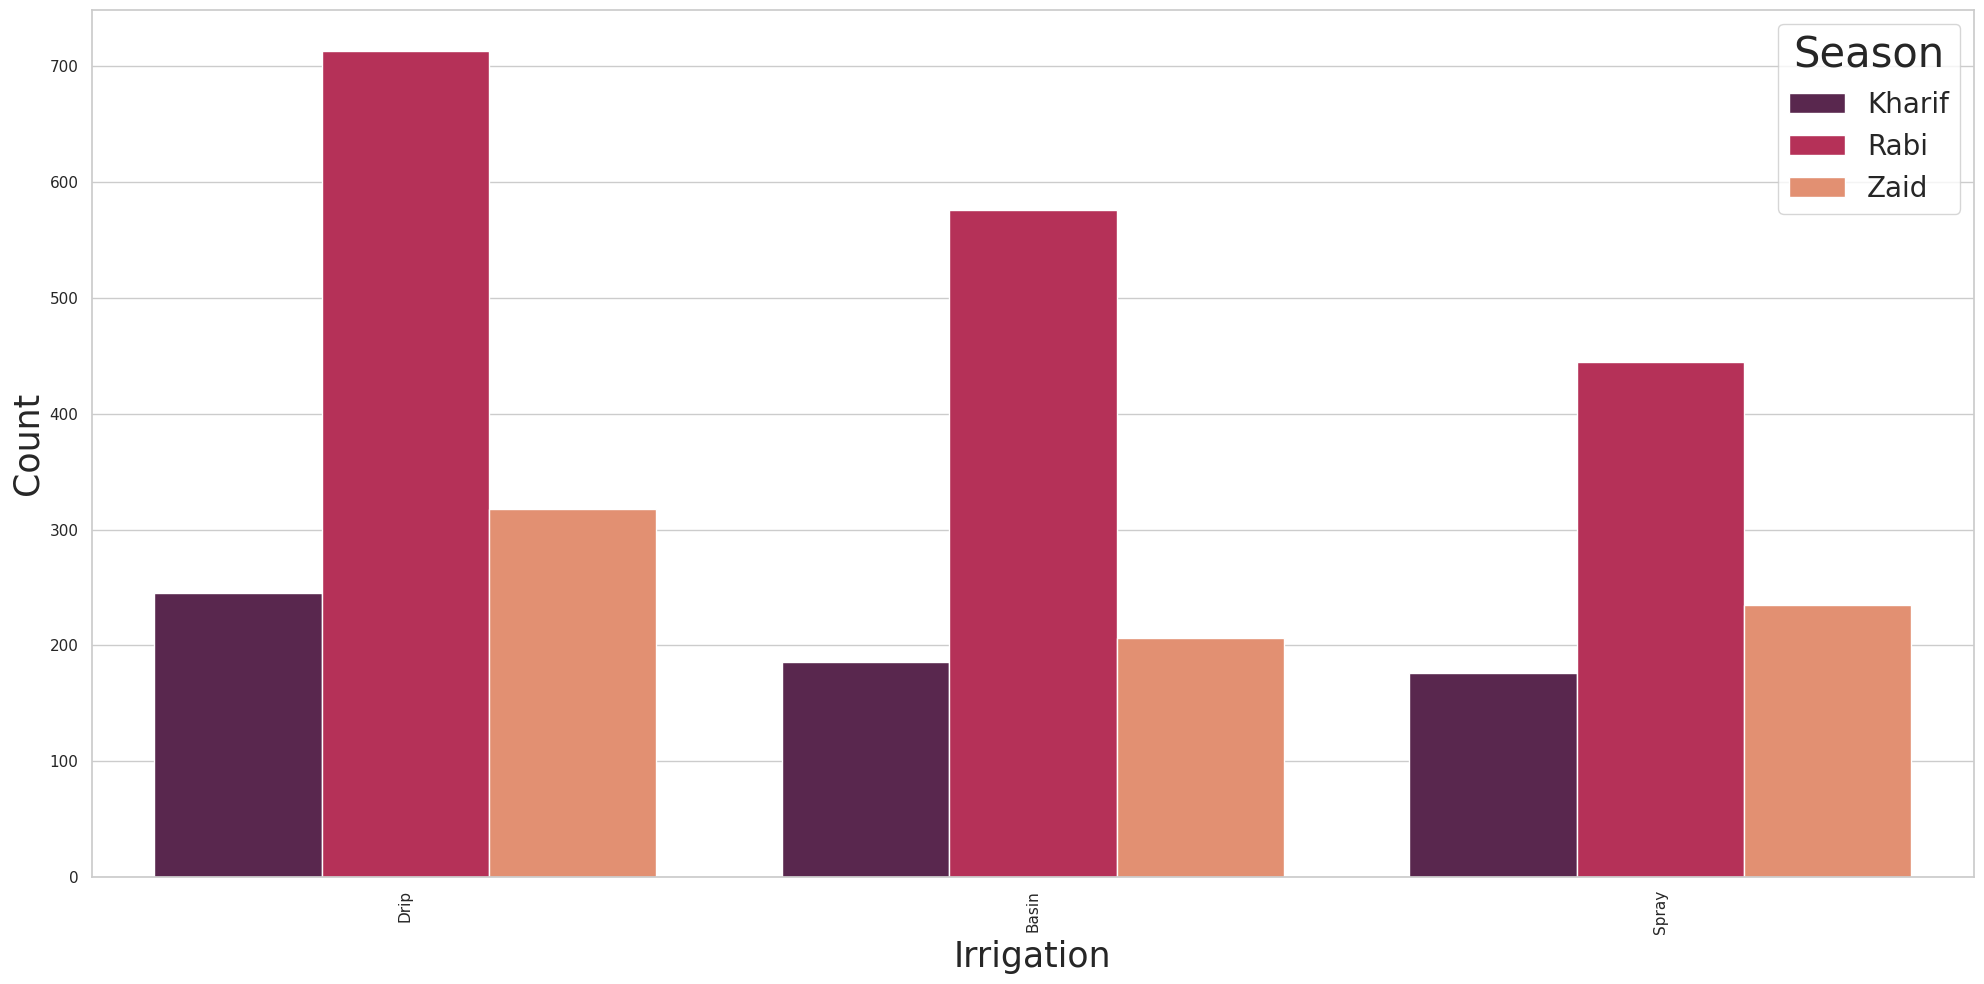

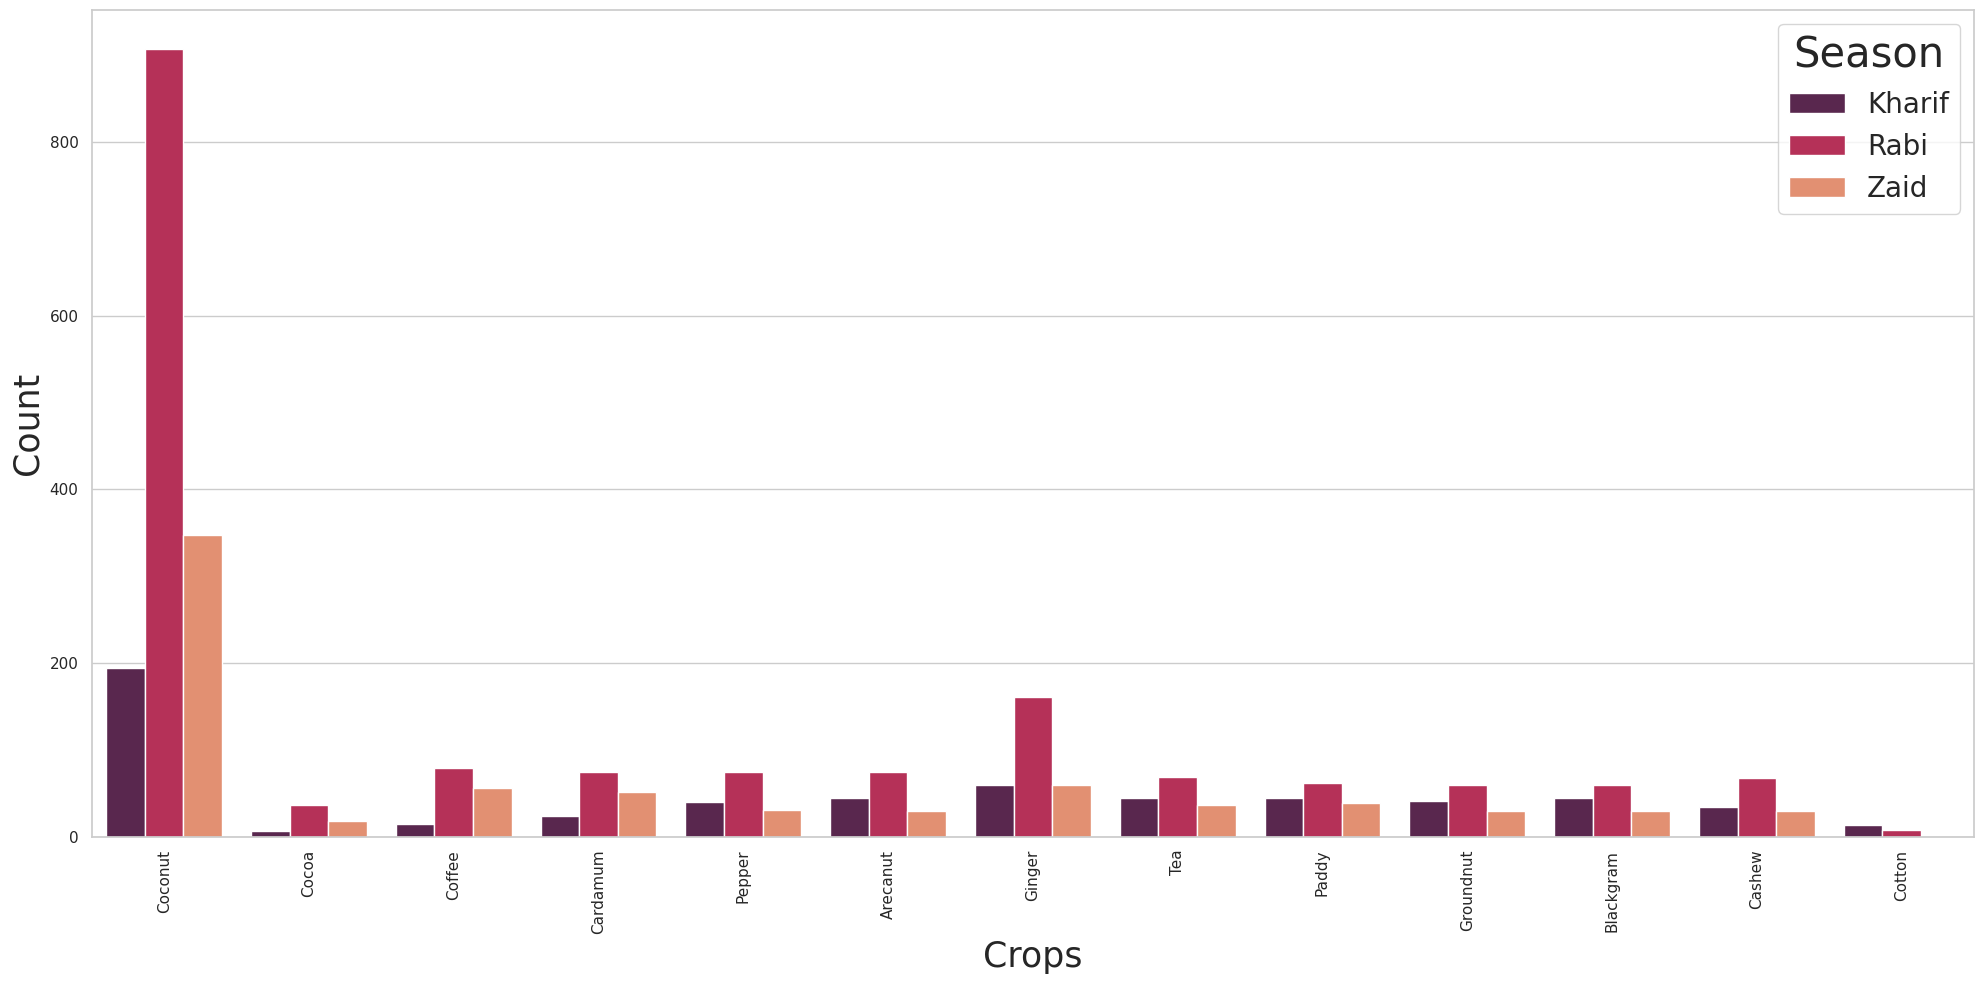

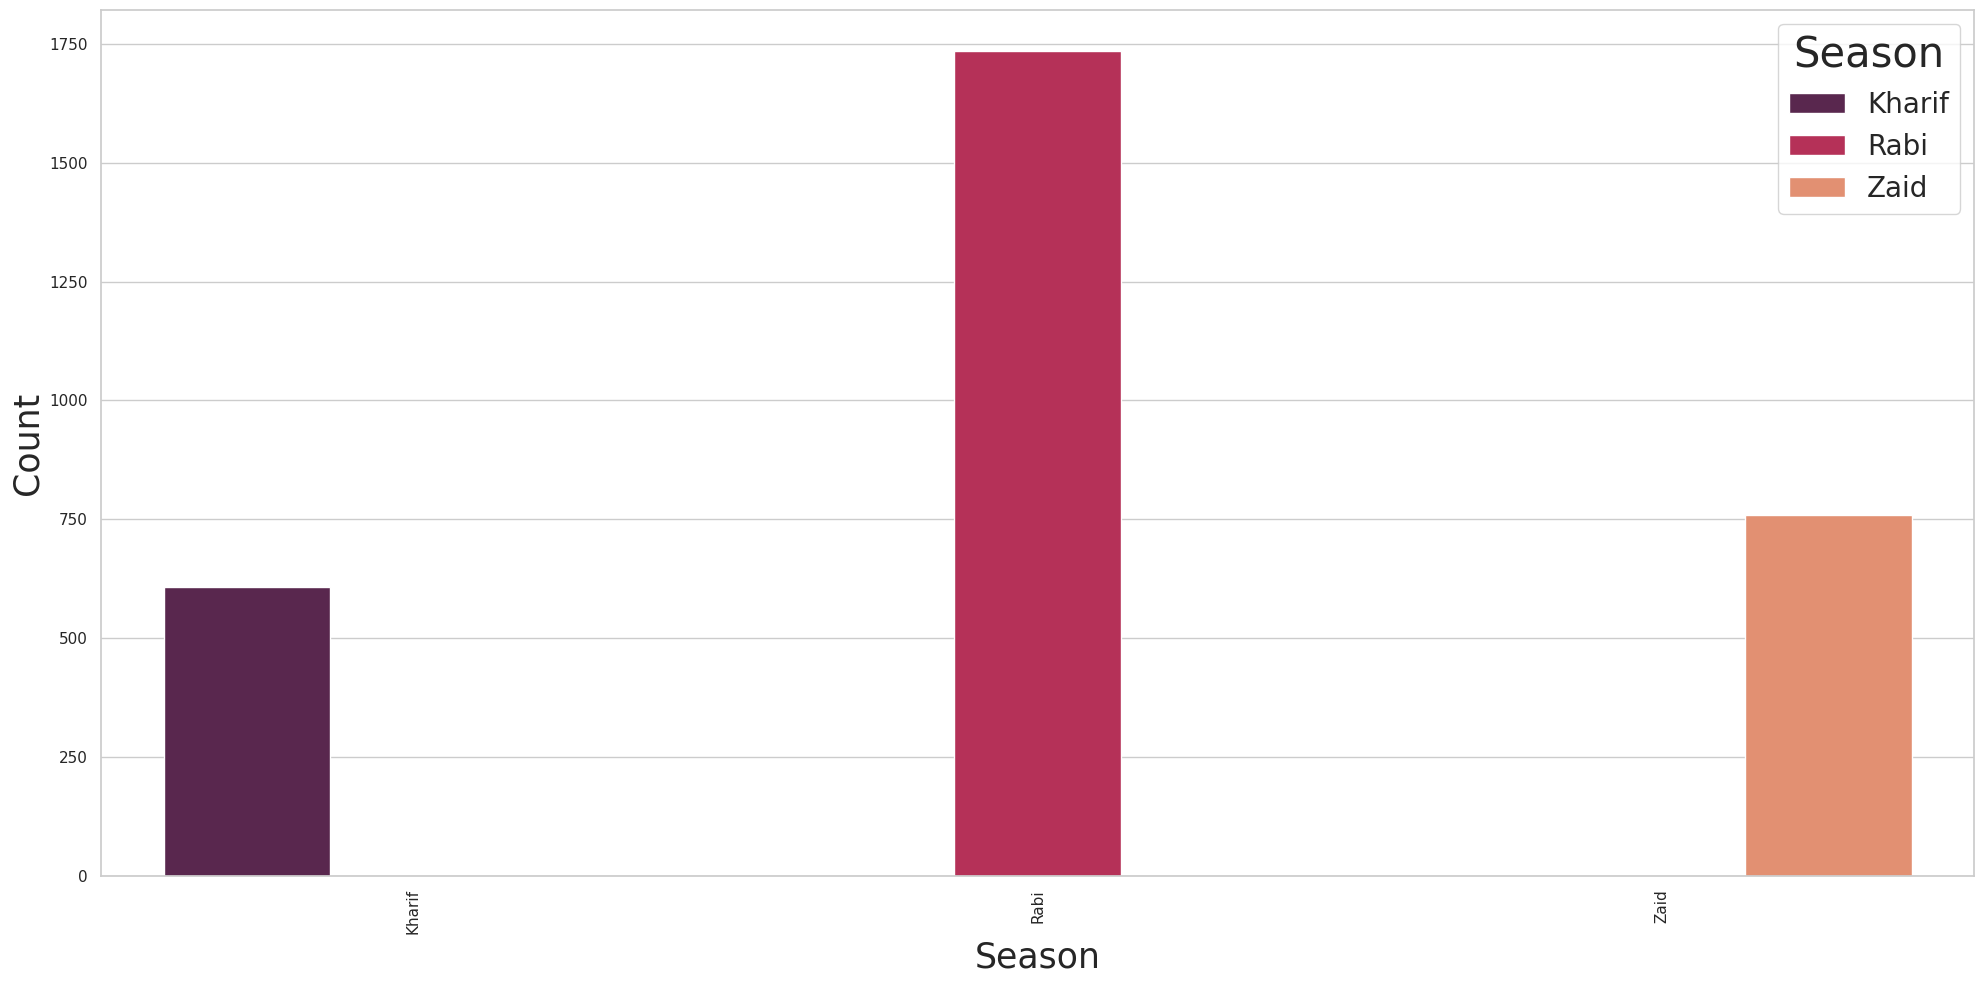

In [42]:
# Loop through each column in num_columns
for i, col in enumerate(categorical_cols):

    plt.figure(figsize=(20, 10))

    # Create countplot
    myplot = sns.countplot(data=df_c, x=col, hue="Season", palette='rocket')

    # Rotate x-tick labels and adjust label sizes
    myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)

    # Set axis labels
    myplot.set_xlabel(col, fontsize=25)
    myplot.set_ylabel("Count", fontsize=25)

    # Increase legend size
    myplot.legend(title='Season', fontsize=20, title_fontsize=30)

    # Adjust the layout and show the plot
    plt.tight_layout()
    plt.show()


## - Other Visualizations

### - Average Crop Yields Over the Years

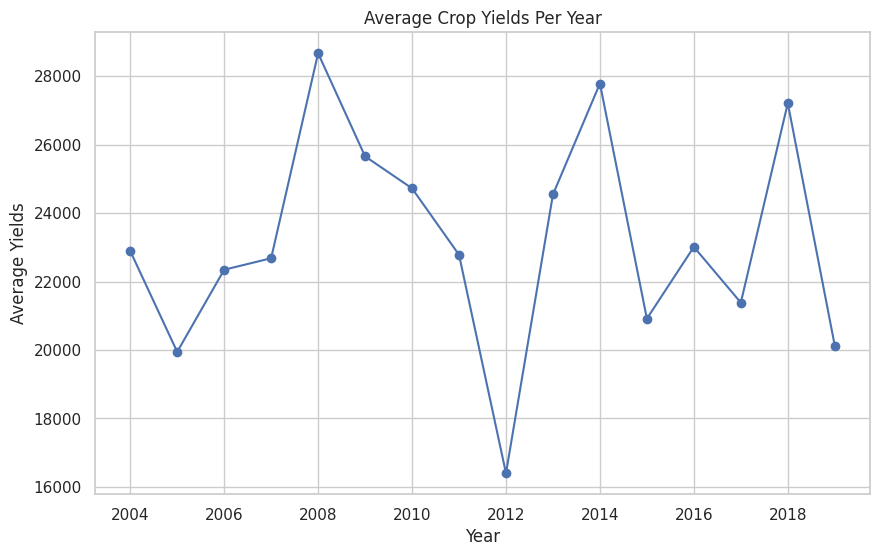

In [43]:
yearly_avg_yields = df.groupby('Year')['Yeilds'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_yields['Year'], yearly_avg_yields['Yeilds'], marker='o')
plt.title('Average Crop Yields Per Year')
plt.xlabel('Year')
plt.ylabel('Average Yields')
plt.grid(True)
plt.show()

### - Rainfall vs Yields

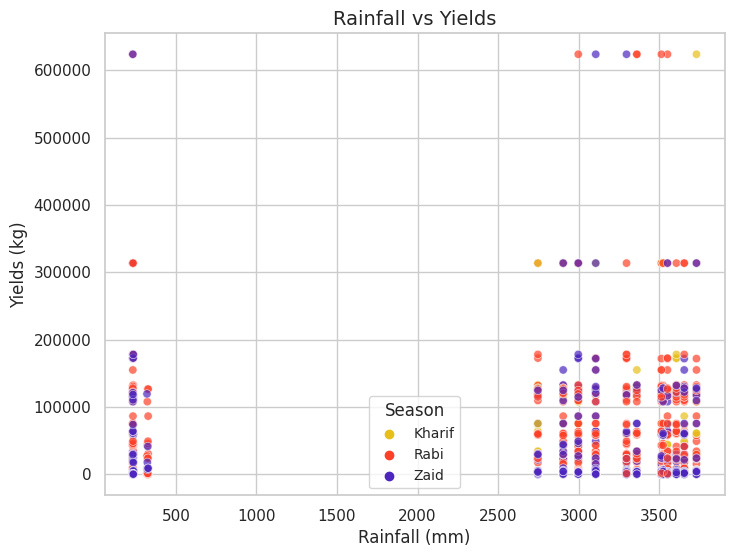

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rainfall', y='Yeilds', data=df, hue='Season', palette='CMRmap_r', alpha=0.7)
plt.title('Rainfall vs Yields', fontsize=14)
plt.xlabel('Rainfall (mm)', fontsize=12)
plt.ylabel('Yields (kg)', fontsize=12)
plt.legend(title='Season', fontsize=10)
plt.grid(True)
plt.show()